In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("DA_Task_2.xlsx")

In [3]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


In [4]:
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

<h1>Inference:</h1>

These are the column names which are present in my dataset.Since many of the column names are in all capital letters, so we'll make them in proper case.

In [5]:
# Convert column names to Proper Case
df.columns = ['_'.join(word.capitalize() for word in col.split('_')) for col in df.columns]

In [6]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Campaign_Nbr', 'Reporting_Cost', 'Totalcost',
       'Lbrcost', 'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_D

<h1>Inference:</h1>

Now, the column names are in proper case which is better for readability and understanding. 

In [7]:
df.shape

(100, 52)

<h1>Inference:</h1>

There are 100 rows and 52 columns present in the given dataset.

<h1>Data Types Of Columns Present</h1>

In [8]:
df.dtypes

Vin                                      object
Transaction_Id                            int64
Correction_Verbatim                      object
Customer_Verbatim                        object
Repair_Date                      datetime64[ns]
Causal_Part_Nm                           object
Global_Labor_Code_Description            object
Platform                                 object
Body_Style                               object
Vppc                                     object
Plant                                    object
Build_Country                            object
Last_Known_Dlr_Name                      object
Last_Known_Dlr_City                      object
Repairing_Dealer_Code                    object
Dealer_Name                              object
Repair_Dlr_City                          object
State                                    object
Dealer_Region                             int64
Repair_Dlr_Postal_Cd                     object
Repair_Age                              

<h1>Inference:</h1>

Out of 52 columns, 33 columns are having categorical data type, 18 are having numerical data type and 1 is having date time format data type. It seems that Repair_Date is not having proper date time format, so we will make it appropriate in next line of code.

In [9]:
# Ensure REPAIR_DATE is in datetime format
df['Repair_Date'] = pd.to_datetime(df['Repair_Date'], errors='coerce')

# Check result
print(df['Repair_Date'].dtypes)

datetime64[ns]


<h1>Checking For Non-Null Values & Data Type</h1>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Vin                            100 non-null    object        
 1   Transaction_Id                 100 non-null    int64         
 2   Correction_Verbatim            100 non-null    object        
 3   Customer_Verbatim              100 non-null    object        
 4   Repair_Date                    100 non-null    datetime64[ns]
 5   Causal_Part_Nm                 95 non-null     object        
 6   Global_Labor_Code_Description  100 non-null    object        
 7   Platform                       100 non-null    object        
 8   Body_Style                     100 non-null    object        
 9   Vppc                           100 non-null    object        
 10  Plant                          99 non-null     object        
 11  Build_Country       

<h1>Inference:</h1>

From the above code we can see that many variables are having null values and one variable by the name "Campaign_Nbr" is not having any values all in the dataset, so it would be appropriate to remove that numerical column.

These columns are having respective number of missing values:

Causal_Part_Nm — 5 missing

Plant — 1 missing

State — 2 missing

Repair_Dlr_Postal_Cd — 2 missing

Veh_Test_Grp — 2 missing

Optn_Famly_Certification — 10 missing

Optf_Famly_Emissiof_System — 5 missing

Campaign_Nbr — 100 missing

Totalcost — 6 missing

Engine_Source_Plant — 12 missing

Engine_Trace_Nbr — 12 missing

Transmission_Source_Plant — 12 missing

Transmission_Trace_Nbr — 12 missing

Line_Series — 1 missing

Last_Known_Delvry_Type_Cd — 2 missing

<h1>Checking For Unique Values in Each Columns</h1>

In [11]:
df.nunique()

Vin                               98
Transaction_Id                    32
Correction_Verbatim               93
Customer_Verbatim                100
Repair_Date                       29
Causal_Part_Nm                    18
Global_Labor_Code_Description      4
Platform                          11
Body_Style                         6
Vppc                              26
Plant                             11
Build_Country                      3
Last_Known_Dlr_Name              100
Last_Known_Dlr_City               94
Repairing_Dealer_Code             95
Dealer_Name                      100
Repair_Dlr_City                   93
State                             39
Dealer_Region                      2
Repair_Dlr_Postal_Cd              92
Repair_Age                        35
Km                               100
Complaint_Cd_Csi                   1
Complaint_Cd                       7
Veh_Test_Grp                      23
Country_Sale_Iso                   6
Ord_Selling_Src_Cd                 7
O

<h1>Inference:</h1>

From this line of code, we can easily see which columns are having how many unique values, for example, Transcation_ID is having 6 unique values, body style has 6 and so on.

<h1>Describing Each Column & Their Importance to Stakeholders</h1>

In [12]:
pd.set_option('display.max_colwidth', None)

# Reordered data
data = {
    "Column Name": [
        "VIN", "TRANSACTION_ID", "REPAIR_DATE", "REPAIR_AGE", "KM",
        "CAUSAL_PART_NM", "COMPLAINT_CD", "CUSTOMER_VERBATIM", "CORRECTION_VERBATIM",
        "GLOBAL_LABOR_CODE_DESCRIPTION", "PLATFORM", "BODY_STYLE", "PLANT", "BUILD_COUNTRY",
        "REPAIRING_DEALER_CODE", "DEALER_NAME", "STATE", "DEALER_REGION", "REPAIR_DLR_CITY",
        "LAST_KNOWN_DLR_NAME", "LAST_KNOWN_DLR_CITY", "VPPC", "VEH_TEST_GRP", "REPAIR_DLR_POSTAL_CD", "COMPLAINT_CD_CSI"
    ],
    "Stakeholder Significance": [
        "Unique vehicle identifier; critical for traceability and linking repairs to specific units.",
        "Unique transaction ID for traceability and auditing.",
        "Repair timestamp; enables time trend, seasonal and warranty-lifecycle analysis.",
        "Age of vehicle at time of repair; essential for reliability and warranty lifecycle insights.",
        "Kilometers driven; key usage-based metric for predicting wear/failure.",
        "Part responsible for failure; key for root cause, part replacement and quality tracking.",
        "Categorized issue label; vital for grouping and prioritizing problems.",
        "Customer complaint in free text; enables insight into customer-perceived issues and common complaints.",
        "Technician’s description of the repair action; valuable for identifying actual fixes and systemic problems.",
        "Description of the labor task; helpful in categorizing repair types.",
        "Platform type (vehicle base); important for segment-based failure analysis.",
        "Body design; relates to part compatibility and failure risks.",
        "Manufacturing plant; supports quality tracing and plant-specific issue detection.",
        "Country where vehicle was built; potentially relevant for region-based quality metrics.",
        "Current repair dealer ID; helps track performance at dealer level.",
        "Dealer name; links to customer satisfaction, repair turnaround etc.",
        "State-level granularity for identifying high-issue regions.",
        "Grouping of dealers by region; good for high-level summaries.",
        "Geographical location; useful for regional repair analysis.",
        "Previous dealer name; helps in tracing past service providers.",
        "Location context for dealer analysis and service density.",
        "Internal product code; may assist in mapping features to failure rates.",
        "Test group or batch; possibly useful for QA/test cycle tracking.",
        "Location pinpointing; helpful for mapping and clustering repairs.",
        "Single-valued; may not be useful alone unless mapped to category."
    ]
}

In [13]:
# Create DataFrame
data = pd.DataFrame(data)

In [14]:
data.shape

(25, 2)

In [15]:
data

,Column Name,Stakeholder Significance
0,VIN,Unique vehicle identifier; critical for traceability and linking repairs to specific units.
1,TRANSACTION_ID,Unique transaction ID for traceability and auditing.
2,REPAIR_DATE,"Repair timestamp; enables time trend, seasonal and warranty-lifecycle analysis."
3,REPAIR_AGE,Age of vehicle at time of repair; essential for reliability and warranty lifecycle insights.
4,KM,Kilometers driven; key usage-based metric for predicting wear/failure.
5,CAUSAL_PART_NM,"Part responsible for failure; key for root cause, part replacement and quality tracking."
6,COMPLAINT_CD,Categorized issue label; vital for grouping and prioritizing problems.
7,CUSTOMER_VERBATIM,Customer complaint in free text; enables insight into customer-perceived issues and common complaints.
8,CORRECTION_VERBATIM,Technician’s description of the repair action; valuable for identifying actual fixes and systemic problems.
9,GLOBAL_LABOR_CODE_DESCRIPTION,Description of the labor task; helpful in categorizing repair types.


<h1>Inference:</h1>
    
These are the columns which are present in the dataset with their description,and decreasing order of significance for the stakeholders as per my reasoning and logical thinking goes. 

<h1>Separating Categorical and Numerical Columns</h1>

In [16]:
df_cat=df.select_dtypes(include="object")

In [17]:
df_cat.shape

(100, 33)

In [18]:
df_cat

,Vin,Correction_Verbatim,Customer_Verbatim,Causal_Part_Nm,Global_Labor_Code_Description,Platform,Body_Style,Vppc,Plant,Build_Country,...,Engine,Engine_Desc,Transmission,Transmission_Desc,Engine_Source_Plant,Engine_Trace_Nbr,Transmission_Trace_Nbr,Media_Flag,Vin_Modl_Desgtr,Line_Series
0,3HCFDDE89SH220903,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,SIL,MX,...,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT, ALUM, CSS50V, VAR. 2",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210281MFTX0488,S2210121CNJX0941,N,CF10543,1500
1,1HRFFEE8XSZ230636,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",CUSTOMER STATES HEATED STEERING WHEEL INOP,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,...,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT, ALUM, CSS50V, VAR. 2",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,V2210291MFTX0188,R2210881CNJX0287,Y,TF10543,1500
2,1HYKSMRK6SZ000990,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,SHT,US,...,EN0,NONE,MF1,NONE,NaN,NaN,NaN,Y,6MB26,Lux-1
3,3HCFDFEL3SH241701,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,NaN,MX,...,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2210821MFYX0482,S1210822CKJX0291,Y,CF10543,1500
4,1HRFFHEL1RZ181474,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,FTW,US,...,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N2212994MGPX0790,R2212982CKJX0282,N,TF10543,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1HYKNHRS6MZ221833,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,CUSTOMER STATES that the steering is very tight and you can hear it rubbing in the steering column when you turn PRA 497110800000,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,Global Crossover Vehicles,4 Door Utility,C1UL,SHT,US,...,LGX,"GAS, 6 CYL, 3.6L, V6, DI, DOHC, VVT, ALUM, GEN 2",M3W,"TRANSMISSION BYT 9 SPD, 9T65, ETRS GEN 1",37749264,W2222192JDRX0209,22222280KKBP0890,Y,6NJ26,Sport
96,1HYKSSRL4SZ003381,replace steering wheel,cs driver assistance warning light is coming on w

In [19]:
df_cat.columns

Index(['Vin', 'Correction_Verbatim', 'Customer_Verbatim', 'Causal_Part_Nm',
       'Global_Labor_Code_Description', 'Platform', 'Body_Style', 'Vppc',
       'Plant', 'Build_Country', 'Last_Known_Dlr_Name', 'Last_Known_Dlr_City',
       'Repairing_Dealer_Code', 'Dealer_Name', 'Repair_Dlr_City', 'State',
       'Repair_Dlr_Postal_Cd', 'Complaint_Cd', 'Veh_Test_Grp',
       'Country_Sale_Iso', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Transaction_Category', 'Engine',
       'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Trace_Nbr',
       'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series'],
      dtype='object')

In [20]:
df_cat.nunique()

Vin                               98
Correction_Verbatim               93
Customer_Verbatim                100
Causal_Part_Nm                    18
Global_Labor_Code_Description      4
Platform                          11
Body_Style                         6
Vppc                              26
Plant                             11
Build_Country                      3
Last_Known_Dlr_Name              100
Last_Known_Dlr_City               94
Repairing_Dealer_Code             95
Dealer_Name                      100
Repair_Dlr_City                   93
State                             39
Repair_Dlr_Postal_Cd              92
Complaint_Cd                       7
Veh_Test_Grp                      23
Country_Sale_Iso                   6
Optn_Famly_Certification           3
Optf_Famly_Emissiof_System         8
Transaction_Category               2
Engine                            12
Engine_Desc                       12
Transmission                      19
Transmission_Desc                 20
E

In [21]:
# Filter categorical columns with <= 20 unique values
low_card_cols = [col for col in df_cat.columns if df_cat[col].nunique() <= 20]

In [22]:
low_card_cols

['Causal_Part_Nm',
 'Global_Labor_Code_Description',
 'Platform',
 'Body_Style',
 'Plant',
 'Build_Country',
 'Complaint_Cd',
 'Country_Sale_Iso',
 'Optn_Famly_Certification',
 'Optf_Famly_Emissiof_System',
 'Transaction_Category',
 'Engine',
 'Engine_Desc',
 'Transmission',
 'Transmission_Desc',
 'Engine_Source_Plant',
 'Media_Flag']

In [23]:
df[low_card_cols].shape

(100, 17)

In [24]:
df[low_card_cols].head()

,Causal_Part_Nm,Global_Labor_Code_Description,Platform,Body_Style,Plant,Build_Country,Complaint_Cd,Country_Sale_Iso,Optn_Famly_Certification,Optf_Famly_Emissiof_System,Transaction_Category,Engine,Engine_Desc,Transmission,Transmission_Desc,Engine_Source_Plant,Media_Flag
0,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,SIL,MX,0-0310,US,FE9,FTB,FREG,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT, ALUM, CSS50V, VAR. 2",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,N
1,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,FTW,US,0-0310,US,FE9,FTB,FREG,LZ0,"DIESEL, 6 CYL, 3.0L, CRI, L6, DOHC, TURBO, VGT, ALUM, CSS50V, VAR. 2",MQC,"BYT 10 SPD, 10L80, ATSS, ETRS, CPA, GEN 2",70628511,Y
2,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,SHT,US,0-0310,US,YF5,FF6,FREG,EN0,NONE,MF1,NONE,NaN,Y
3,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,NaN,MX,0-0890,US,FE9,FTB,FREG,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,Y
4,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,FTW,US,0-0621,US,NE1,FUC,FREG,L87,"GAS, 8 CYL, V8, 6.2L, DI, DFM, ALUM, GEN 5",MHS,"BYT 10 SPD, 10L80, GRX, GEN 1, ATSS, ETRS, VAR 1",830107152,N


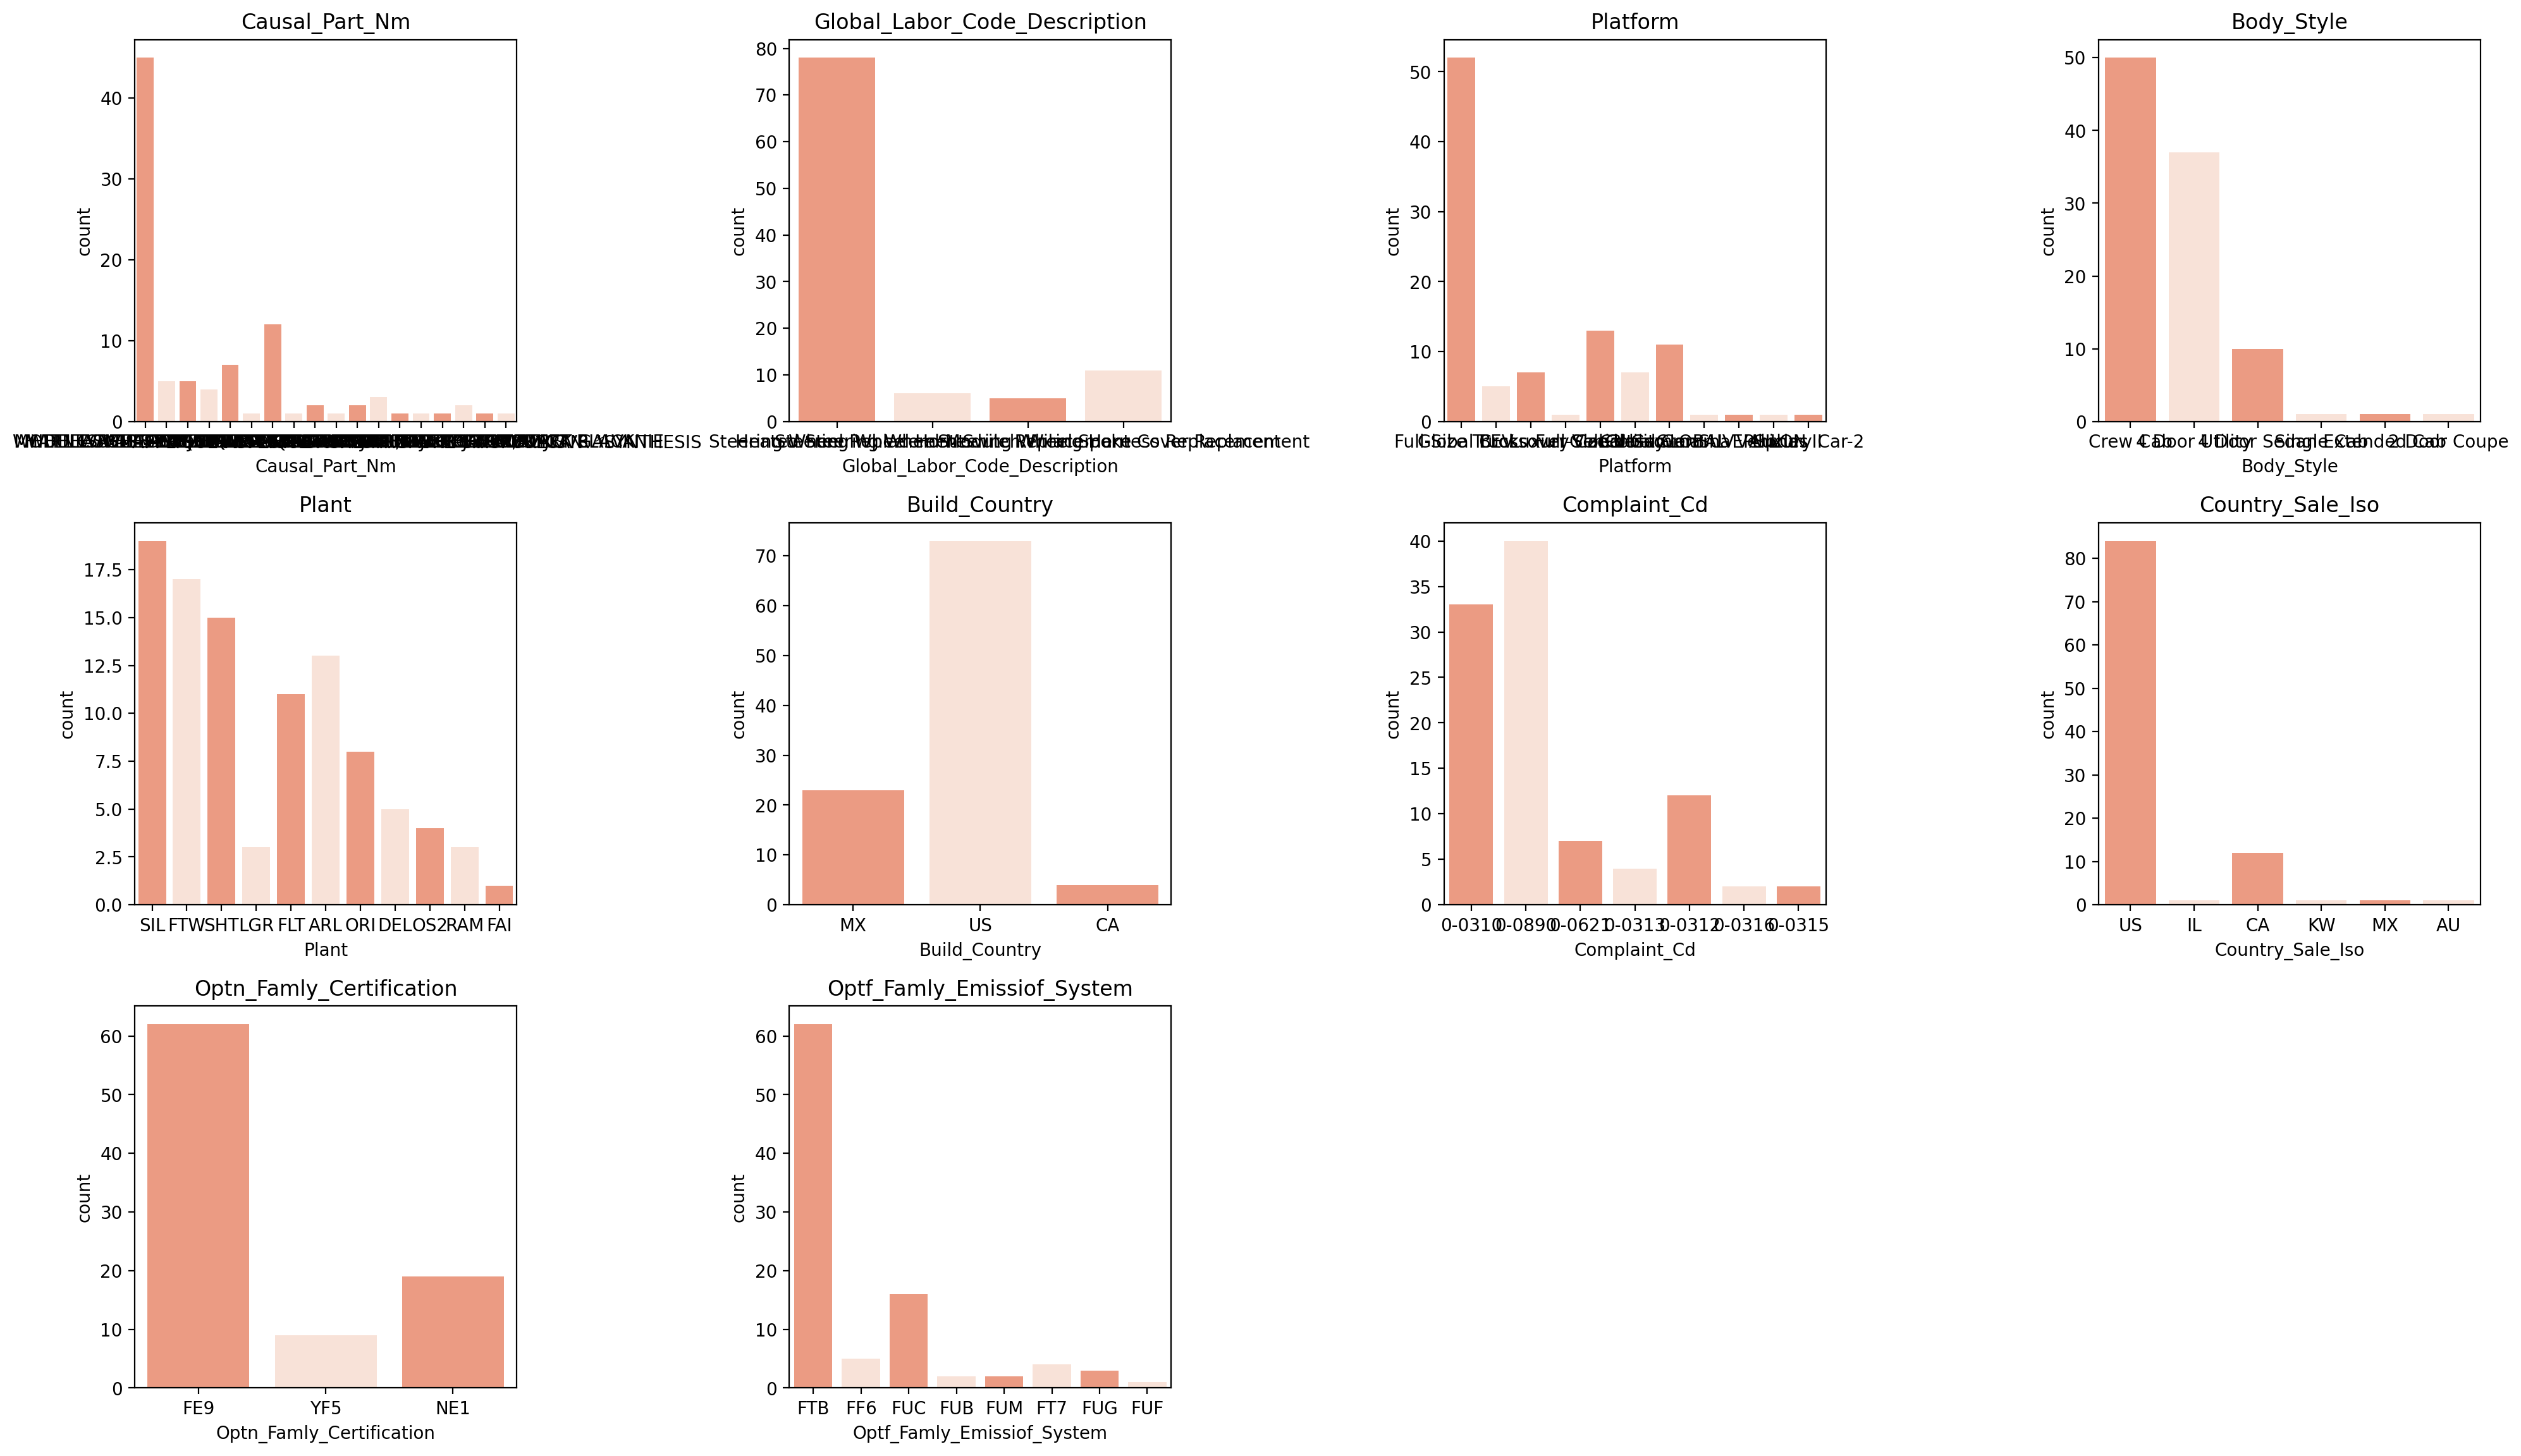

In [25]:
# Assuming df is your DataFrame
feat = ['Causal_Part_Nm',
 'Global_Labor_Code_Description',
 'Platform',
 'Body_Style',
 'Plant',
 'Build_Country',
 'Complaint_Cd', 'Country_Sale_Iso',
 'Optn_Famly_Certification',
 'Optf_Famly_Emissiof_System']

# Create subplots for each feature
plt.figure(figsize=(20,15),dpi=200)  # Adjusting the figure size
for i, feature in enumerate(feat):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.countplot(data=df, x=feature,palette=["#fc9272","#fee0d2"])
    plt.title(feature)
    
plt.tight_layout()  # Adjusting the layout for better spacing between subplots
plt.show()

<h1>Inference:</h1>
    
We have done the data visualization for categorical columns using count plots and draw the following conclusion from plots:

1. Causal_Part_Nm: There are multiple unique values in this plots, and one of the unique values is having huge frequency in the data.
2. Global_Labor_Code_Description: There are four unique values in this column and 1 of the unique value is having huge frequency in the data.
3. Platform: There are 11 unique values in this column and 3 of the unique values are having high frequency in the whole dataset.
4. Plant: This dataset has 11 unique values in the dataset, and 6 unique values in the dataset which are having high frequency in the whole dataset.
5. Body Style: This dataset has 6 unique values in the dataset, and 3 unique values in the dataset which are having high frequency in the whole dataset.
6. Build Country: We can see from the count plot that the most of the components are build in USA than in MX and then in canada.
7. Complaint_CD: We can see from the count plot that the unique values are 7 and 0-0.8 has maximum no. of components.
8. Country_Sale_ISO: From the count plot we can say that US leads than any other country.

In [26]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Campaign_Nbr', 'Reporting_Cost', 'Totalcost',
       'Lbrcost', 'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_D

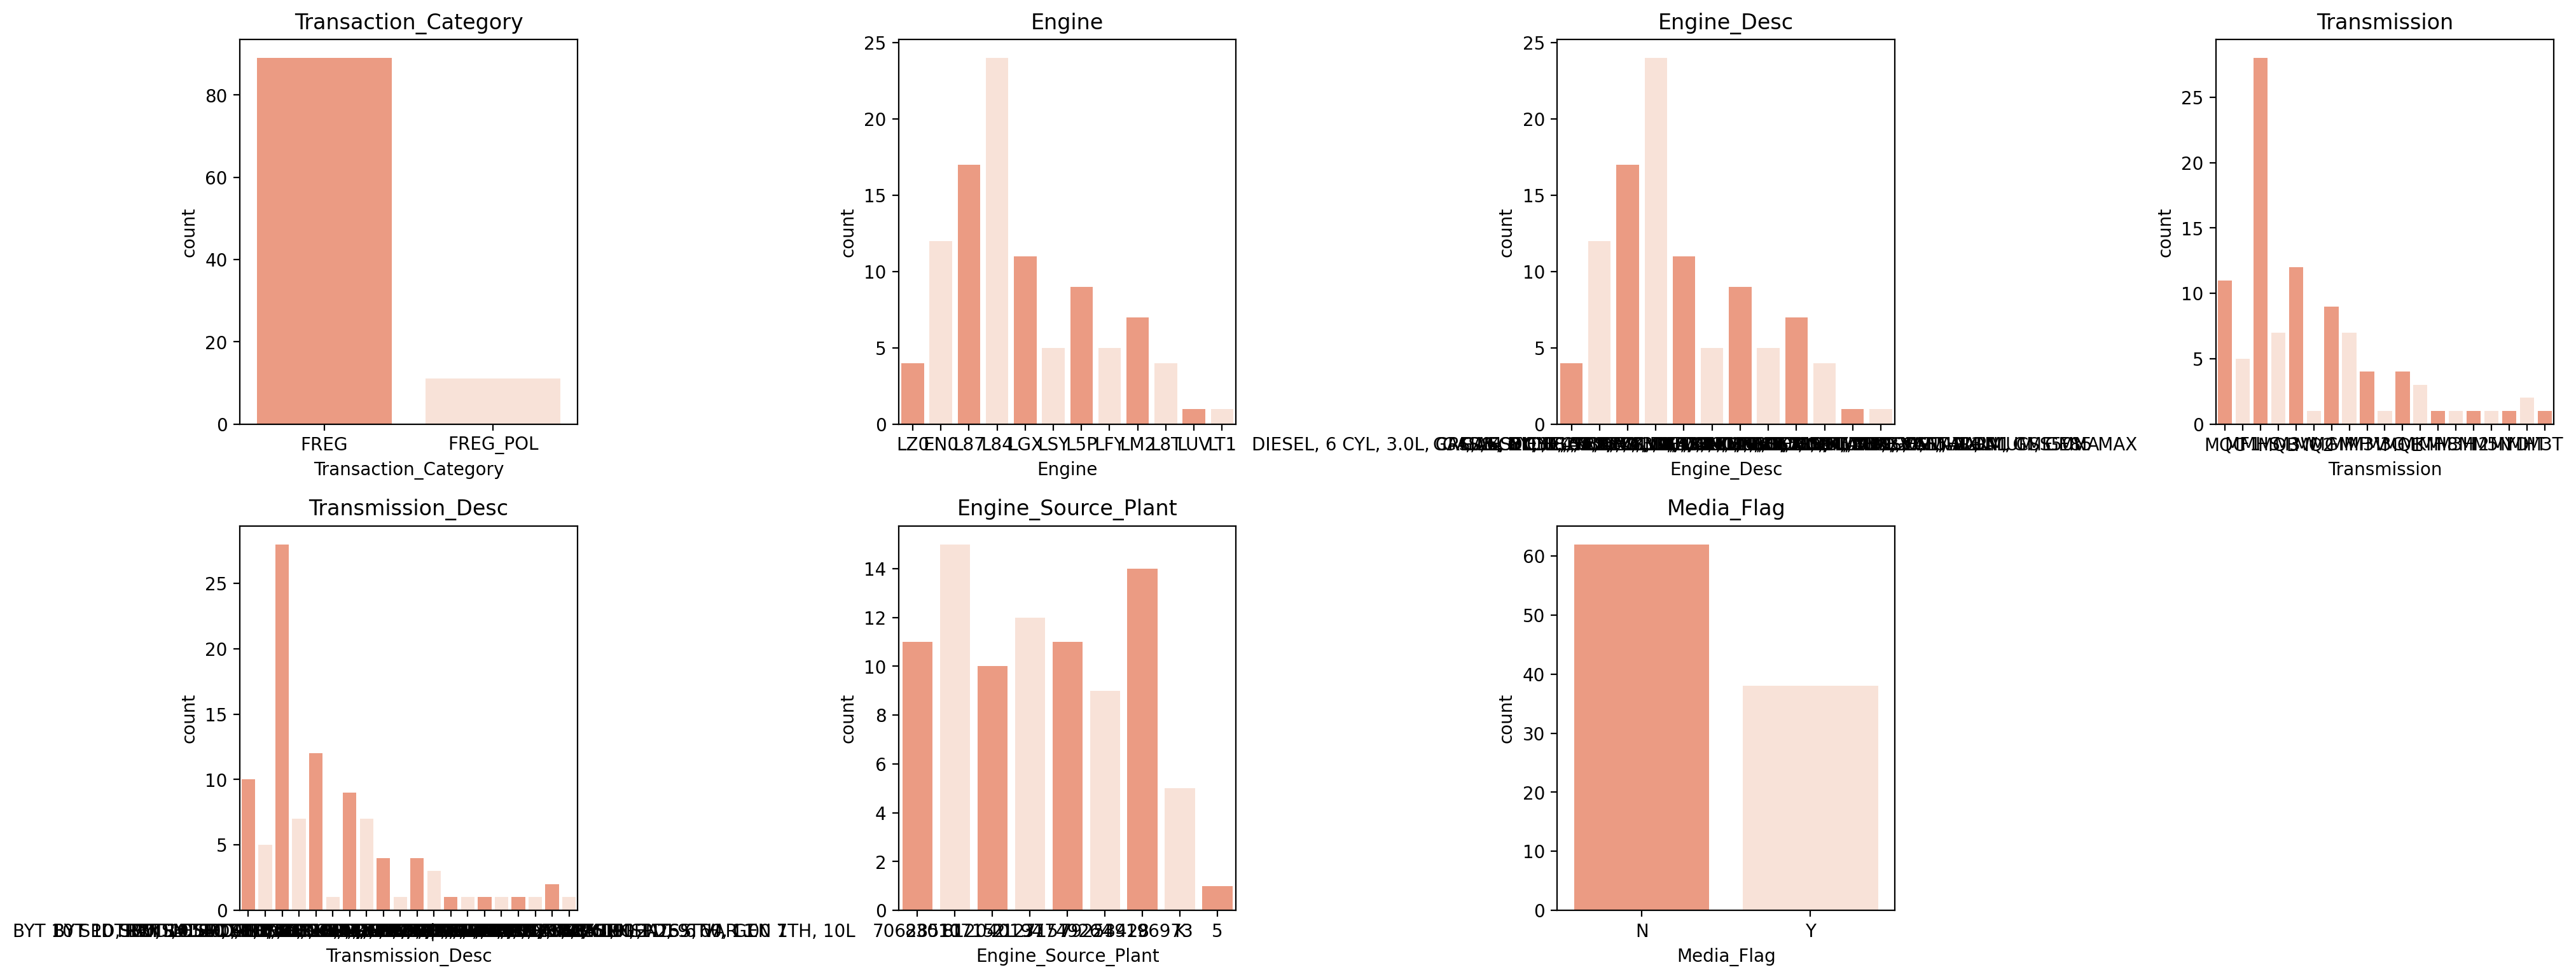

In [27]:
# Assuming df is your DataFrame
feat = ['Transaction_Category',
 'Engine',
 'Engine_Desc',
 'Transmission',
 'Transmission_Desc',
 'Engine_Source_Plant',
 'Media_Flag']

# Create subplots for each feature
plt.figure(figsize=(20,15),dpi=200)  # Adjusting the figure size
for i, feature in enumerate(feat):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.countplot(data=df, x=feature,palette=["#fc9272","#fee0d2"])
    plt.title(feature)
    
plt.tight_layout()  # Adjusting the layout for better spacing between subplots
plt.show()

<h1>Inference:</h1>
    
We have done the data visualization for categorical columns using count plots and draw the following conclusion from plots:

1. Transaction_Category: Most of the people use FREG transaction method than FREG_pol.
2. Engine: There are 12 unique values for this column out of which one of them leads.
3. Media flag: No media flag data is more than yes media flag data and so on for other charts also.

<h1>For Numerical Columns: Distribution of Data</h1>

In [28]:
#creating numerical columns dataframe

In [29]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [30]:
df_num

,Transaction_Id,Dealer_Region,Repair_Age,Km,Complaint_Cd_Csi,Ord_Selling_Src_Cd,Global_Labor_Code,Campaign_Nbr,Reporting_Cost,Totalcost,Lbrcost,Transmission_Source_Plant,Src_Txn_Id,Src_Ver_Nbr,Transaction_Cntr,Last_Known_Delvry_Type_Cd,Non_Causal_Part_Qty,Sales_Region_Code
0,13021,1,6,8872,0,13,130,NaN,370.03,370.03,61.46,287827.0,2808908219,6,1,21.0,0,1
1,13028,1,5,16346,0,48,2400,NaN,307.32,307.32,291.14,17749294.0,2808841910,6,1,10.0,0,1
2,13035,1,9,8887,0,12,130,NaN,2457.45,3205.45,1012.67,NaN,2809979441,4,1,10.0,0,1
3,13021,1,10,15500,0,13,130,NaN,445.28,445.28,63.18,287827.0,2808892288,6,1,10.0,0,1
4,13021,1,0,8,0,48,130,NaN,1439.65,1439.65,136.00,17749294.0,2808901882,8,1,10.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13041,1,32,35451,0,12,130,NaN,718.53,1026.53,59.88,822972980.0,2820784987,4,1,15.0,1,1
96,13048,1,8,13393,0,12,130,NaN,1474.06,1474.06,118.90,NaN,2822282187,6,1,10.0,0,1
97,13044,1,12,25341,0,48,130,NaN,481.95,481.95,86.57,822972980.0,2822042248,4,1,10.0,0,1
98,13045,1,4,13,0,13,130,NaN,101.85,101.85,101.85,8042172.0,2820879999,6,1,14.0,0,1


In [31]:
df_num.shape

(100, 18)

<h1>Inference:</h1>
    
    
There are 100 rows and 18 numerical columns in my dataset.

In [32]:
df_num.nunique()

Transaction_Id                32
Dealer_Region                  2
Repair_Age                    35
Km                           100
Complaint_Cd_Csi               1
Ord_Selling_Src_Cd             7
Global_Labor_Code              4
Campaign_Nbr                   0
Reporting_Cost               100
Totalcost                     94
Lbrcost                       99
Transmission_Source_Plant      6
Src_Txn_Id                   100
Src_Ver_Nbr                   10
Transaction_Cntr               1
Last_Known_Delvry_Type_Cd     11
Non_Causal_Part_Qty            2
Sales_Region_Code              2
dtype: int64

<h1>Inference:</h1>

From this code we can see the number of unique values each column is taking, like transaction id is taking 32 unique values, dealer region contains 2 unique values and so on.

<h1>Distribution Charts for numerical columns</h1>

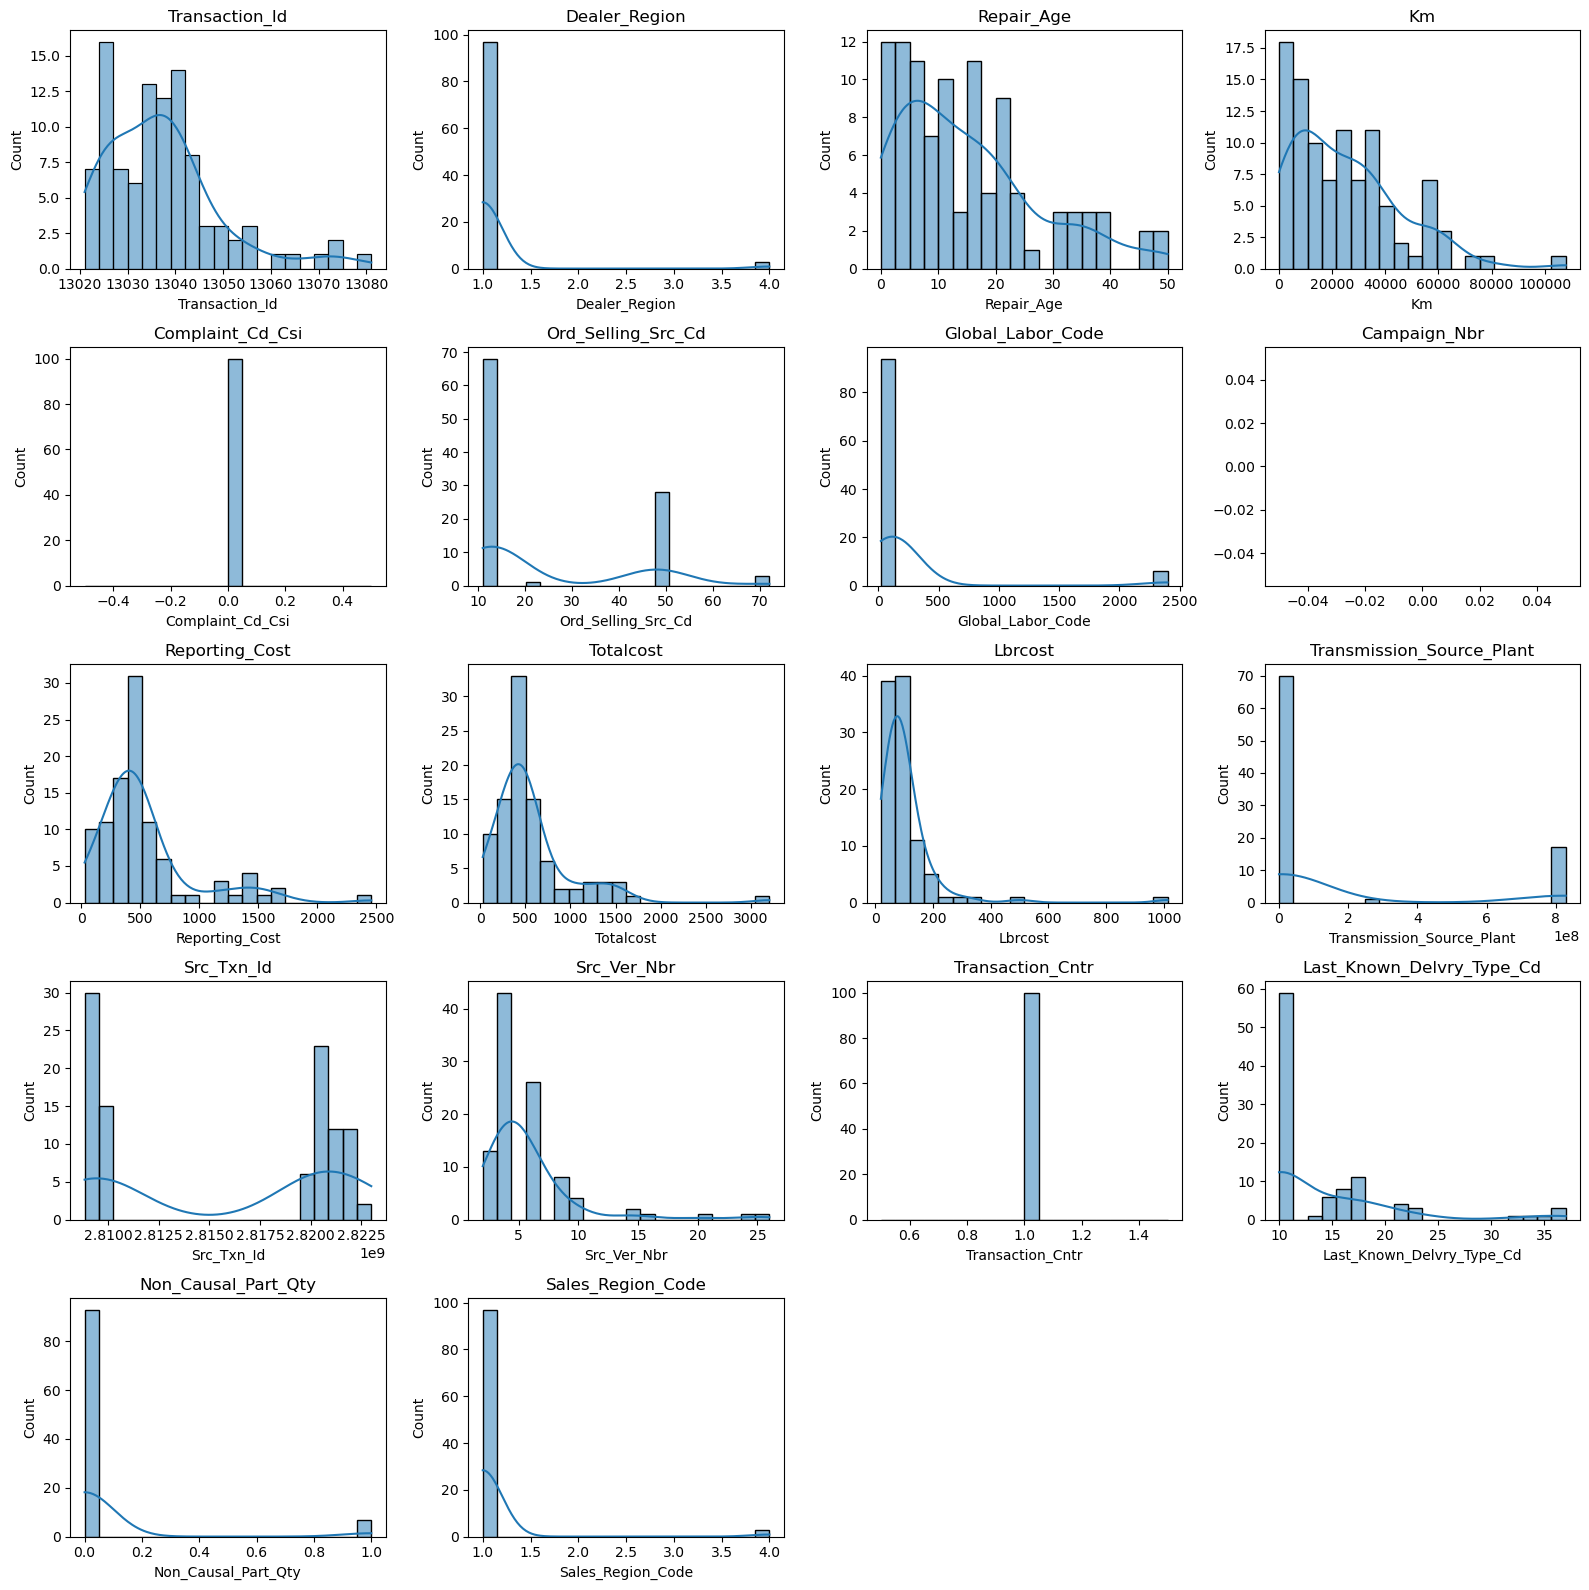

In [33]:
# Select numeric columns
feat = df_num.columns

plt.figure(figsize=(16, 16), dpi=100)

# Loop through numeric features
for i, feature in enumerate(feat):
    plt.subplot(5, 4, i + 1)  # Note: subplot (not subplots)
    sns.histplot(data=df_num, x=feature, kde=True, bins=20)
    plt.title(feature)
    plt.tight_layout()

plt.show()

<h1>Inference:</h1>
    
1. Transaction_Id

Distribution: Appears to be uniform but slightly right-skewed.

Transaction IDs are mostly in a narrow range, indicating possibly sequential IDs. Not much analytical insight apart from confirming there are no missing transaction ranges.


2. Dealer_Region

Distribution: Highly skewed towards region 1. Other regions have very low counts.

Most transactions are coming from one specific dealer region. Analysis may need to check why other regions have low representation.

3. Repair_Age

Distribution: Mostly concentrated between 0 and 25, with fewer repairs after 30. Slight right skew.

Most repairs are done when vehicles are relatively new (0-25 years/months depending on unit). Few repairs happen in older vehicles, which is expected.

4. Km

Distribution: Right-skewed with most vehicles under 50,000 km.

Most repairs happen in vehicles with relatively low mileage. Very few vehicles have extremely high mileage (>80,000 km).

5. Complaint_Cd_Cd

Distribution: Almost all complaints are centered around 0, with a very small variation.

Possibly a categorical or dummy-coded variable with limited variation. Might need one-hot encoding or special handling.

6. Ord_Selling_Src_Cd

Distribution: Mostly concentrated on one value (left peak) with a few other categories showing smaller spikes.

One source code dominates sales. Might be a key feature indicating a preferred selling channel.

7. Global_Labor_Code

Distribution: Highly right-skewed, with most values <500 and a long tail.

Most labor codes are clustered in lower values, possibly indicating simpler repairs are more frequent than complex ones.

8. Campaign_Nbr

Distribution: Almost flat at 0.

Campaigns are not common, possibly no active campaigns for most transactions.

9. Reporting_Cost

Distribution: Right-skewed with a concentration around 500–1000, and fewer repairs costing >1500.

Majority of repairs have low reporting costs; expensive repairs are rare.

10. Totalcost

Distribution: Right-skewed with most values <1000.

Most repairs are cheap; only a small portion of repairs are costly.

11. Laborcost

Distribution: Highly right-skewed.

Similar to total cost, labor cost is low in most repairs, with few expensive ones.

12. Transmission_Source_Plant

Distribution: Majority in one category with a few extreme values.

Most transmissions are sourced from one plant, suggesting limited diversity in supplier sources.

13. Src_Tan_Id & Src_Ver_Nbr

Distribution: Both show strong peaks at single values.

Possibly IDs or codes with little variability, not directly useful for predictive modeling unless encoded.

14. Last_Known_Delvry_Type_Cd

Distribution: Mostly one category dominates.

This variable may not have much variability; might need one-hot encoding.

<h1>Checking for missing values</h1>

In [34]:
df.isnull().sum()

Vin                                0
Transaction_Id                     0
Correction_Verbatim                0
Customer_Verbatim                  0
Repair_Date                        0
Causal_Part_Nm                     5
Global_Labor_Code_Description      0
Platform                           0
Body_Style                         0
Vppc                               0
Plant                              1
Build_Country                      0
Last_Known_Dlr_Name                0
Last_Known_Dlr_City                0
Repairing_Dealer_Code              0
Dealer_Name                        0
Repair_Dlr_City                    0
State                              2
Dealer_Region                      0
Repair_Dlr_Postal_Cd               2
Repair_Age                         0
Km                                 0
Complaint_Cd_Csi                   0
Complaint_Cd                       0
Veh_Test_Grp                       2
Country_Sale_Iso                   0
Ord_Selling_Src_Cd                 0
O

<h1>Inference:</h1>
    
We can see there are many columns having missing values and we need to deal with missing values in the data on the basis of categorical or numerical columns. If the missing values are present in categorical column then we will replace the missing values with the mode of that column and if it is present in numerical columns then we need to check the distribution of the column and on the basis of that we need to replace the missing values with appropriate measures.

<h1>Let's see the mising values in categorical columns</h1>

In [35]:
df_cat.isnull().sum()

Vin                               0
Correction_Verbatim               0
Customer_Verbatim                 0
Causal_Part_Nm                    5
Global_Labor_Code_Description     0
Platform                          0
Body_Style                        0
Vppc                              0
Plant                             1
Build_Country                     0
Last_Known_Dlr_Name               0
Last_Known_Dlr_City               0
Repairing_Dealer_Code             0
Dealer_Name                       0
Repair_Dlr_City                   0
State                             2
Repair_Dlr_Postal_Cd              2
Complaint_Cd                      0
Veh_Test_Grp                      2
Country_Sale_Iso                  0
Optn_Famly_Certification         10
Optf_Famly_Emissiof_System        5
Transaction_Category              0
Engine                            0
Engine_Desc                       0
Transmission                      0
Transmission_Desc                 0
Engine_Source_Plant         

<h1>Inference:</h1>
    
We can see above that there are 10 categorical columns with the missing values and we will use mode to replace them, as they are less in number and we dont need to loose the data.

In [36]:
missing_cols = df_cat.columns[df_cat.isnull().any()]

In [37]:
missing_cols

Index(['Causal_Part_Nm', 'Plant', 'State', 'Repair_Dlr_Postal_Cd',
       'Veh_Test_Grp', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Engine_Source_Plant', 'Engine_Trace_Nbr',
       'Transmission_Trace_Nbr', 'Line_Series'],
      dtype='object')

<h1>Inference</h1>

These are the 10 columns which are having missing values.

<H1>Data Visulization For These Columns</H1>

In [38]:
# List of categorical columns with missing values
missing_cols = [
    'Causal_Part_Nm', 'Plant', 'State', 'Repair_Dlr_Postal_Cd',
    'Veh_Test_Grp', 'Optn_Famly_Certification', 'Optf_Famly_Emissiof_System',
    'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Trace_Nbr',
    'Line_Series'
]

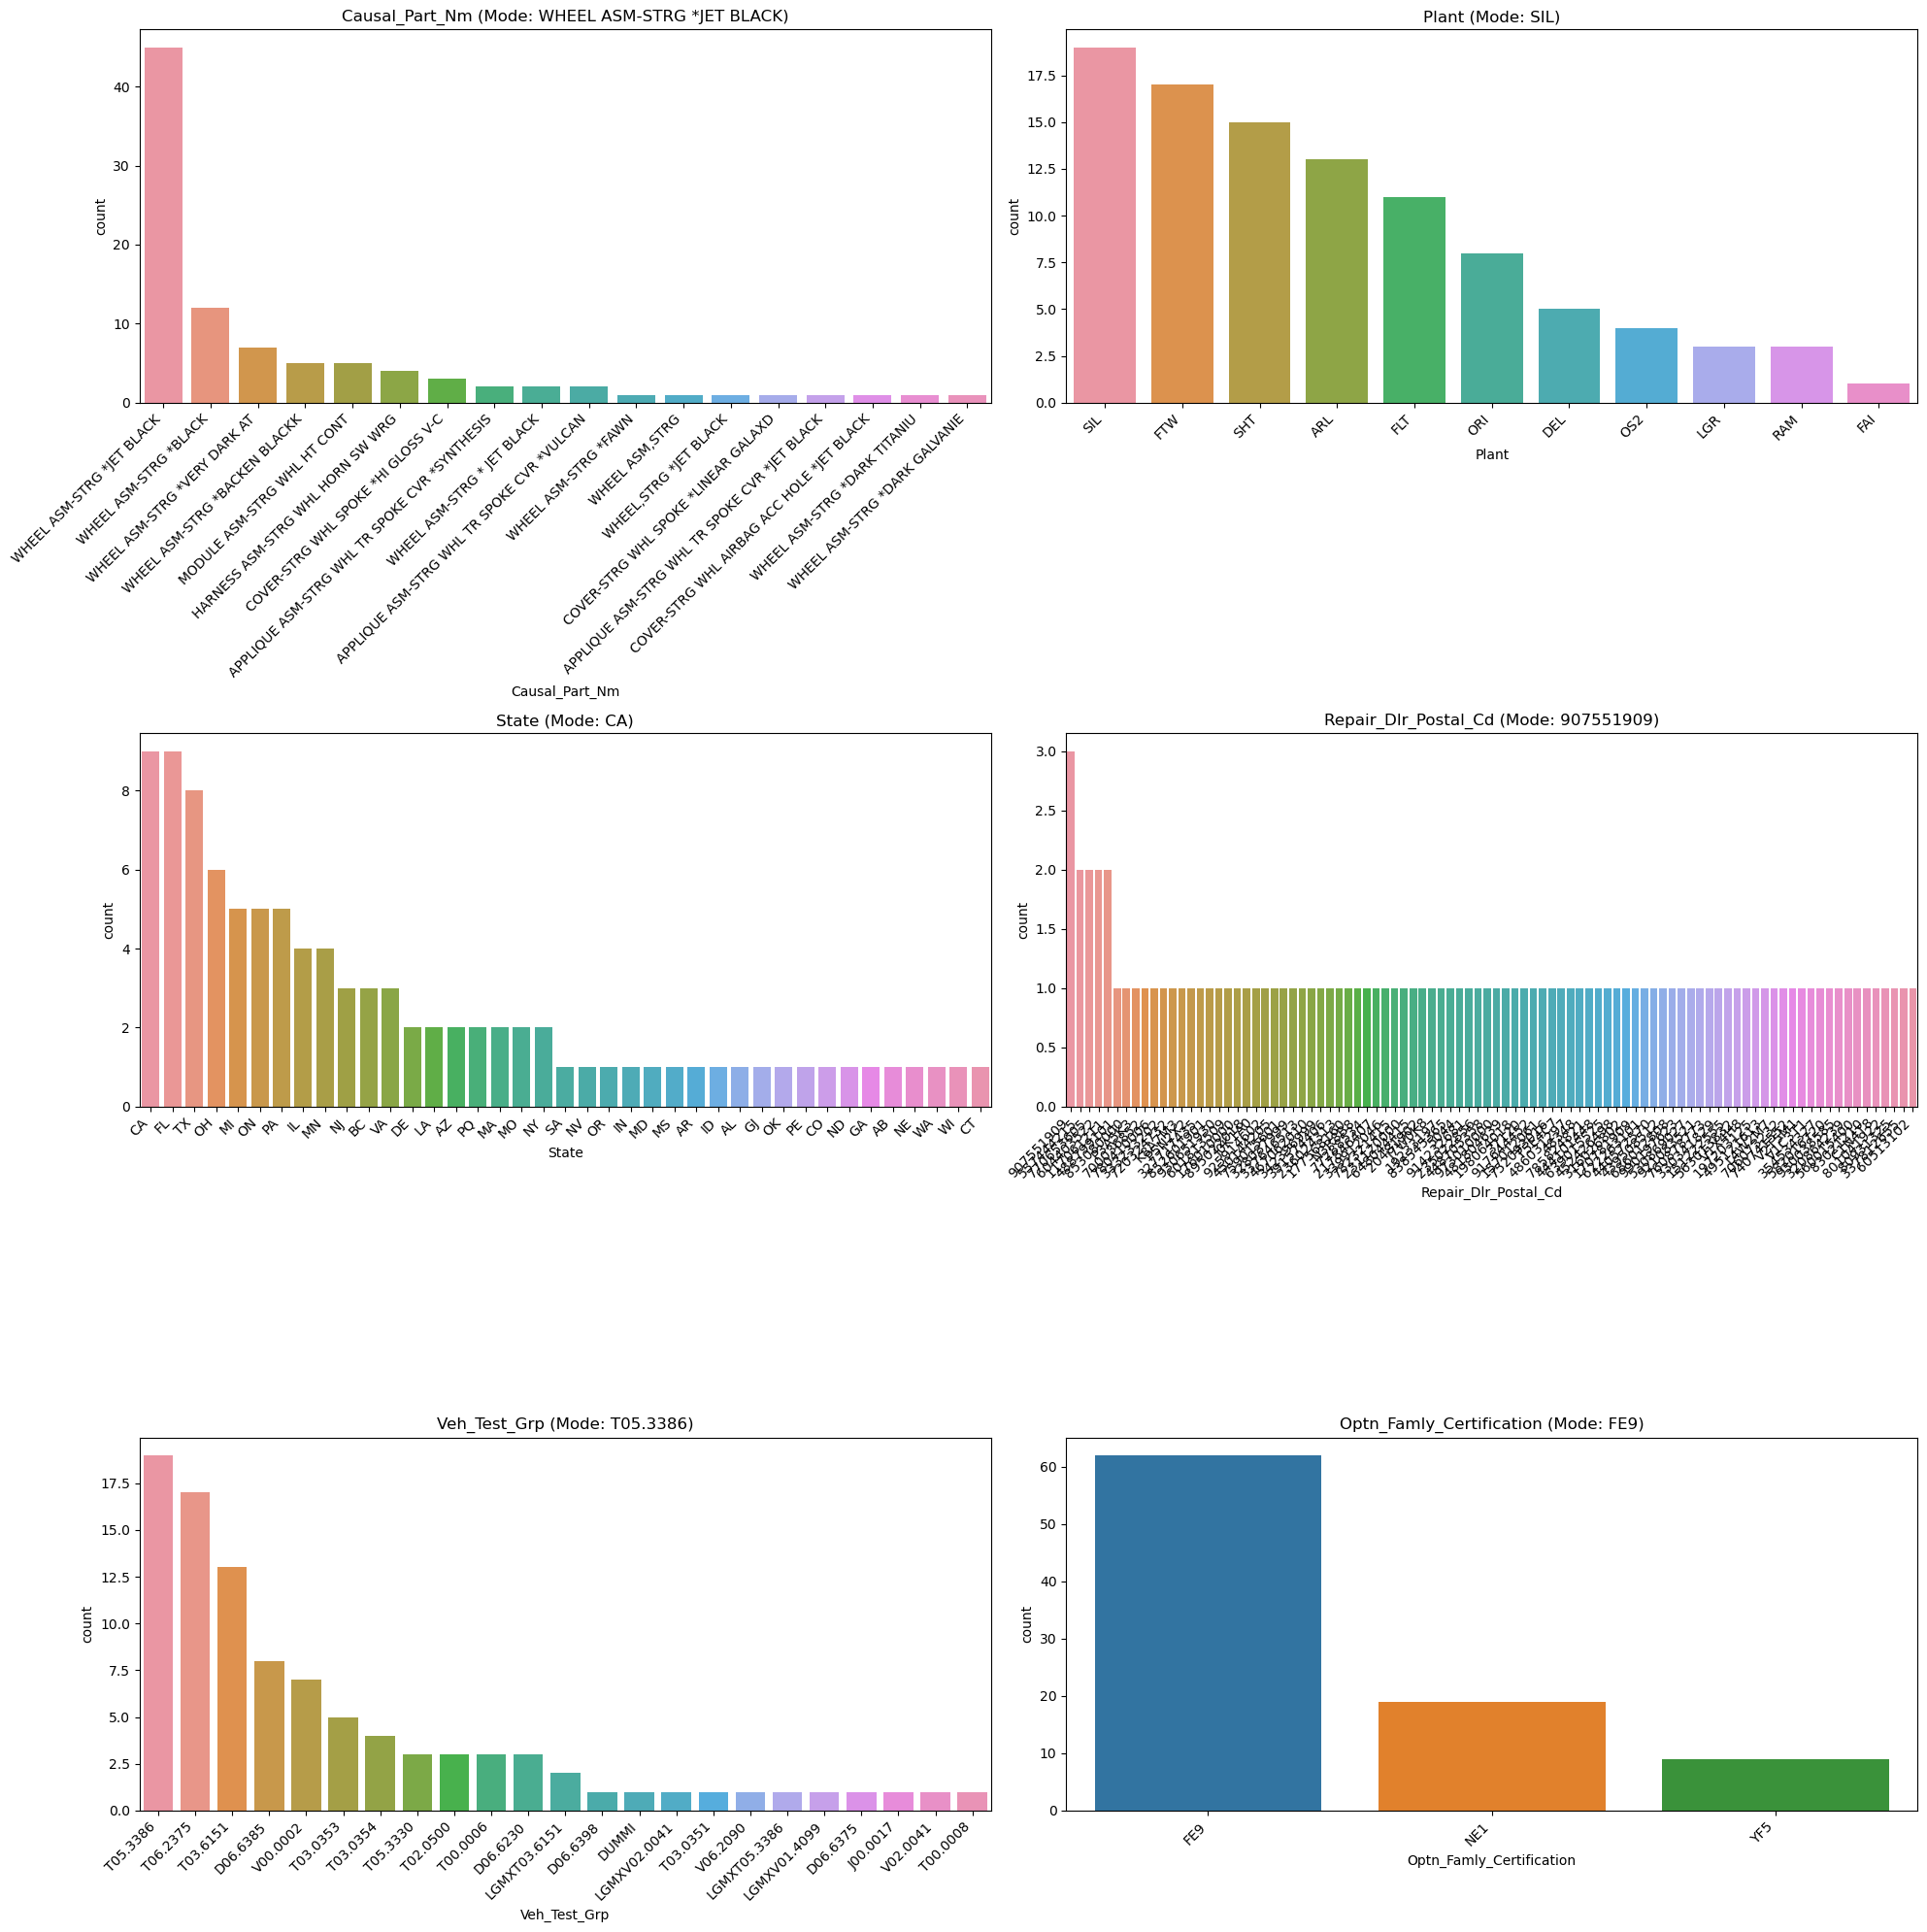

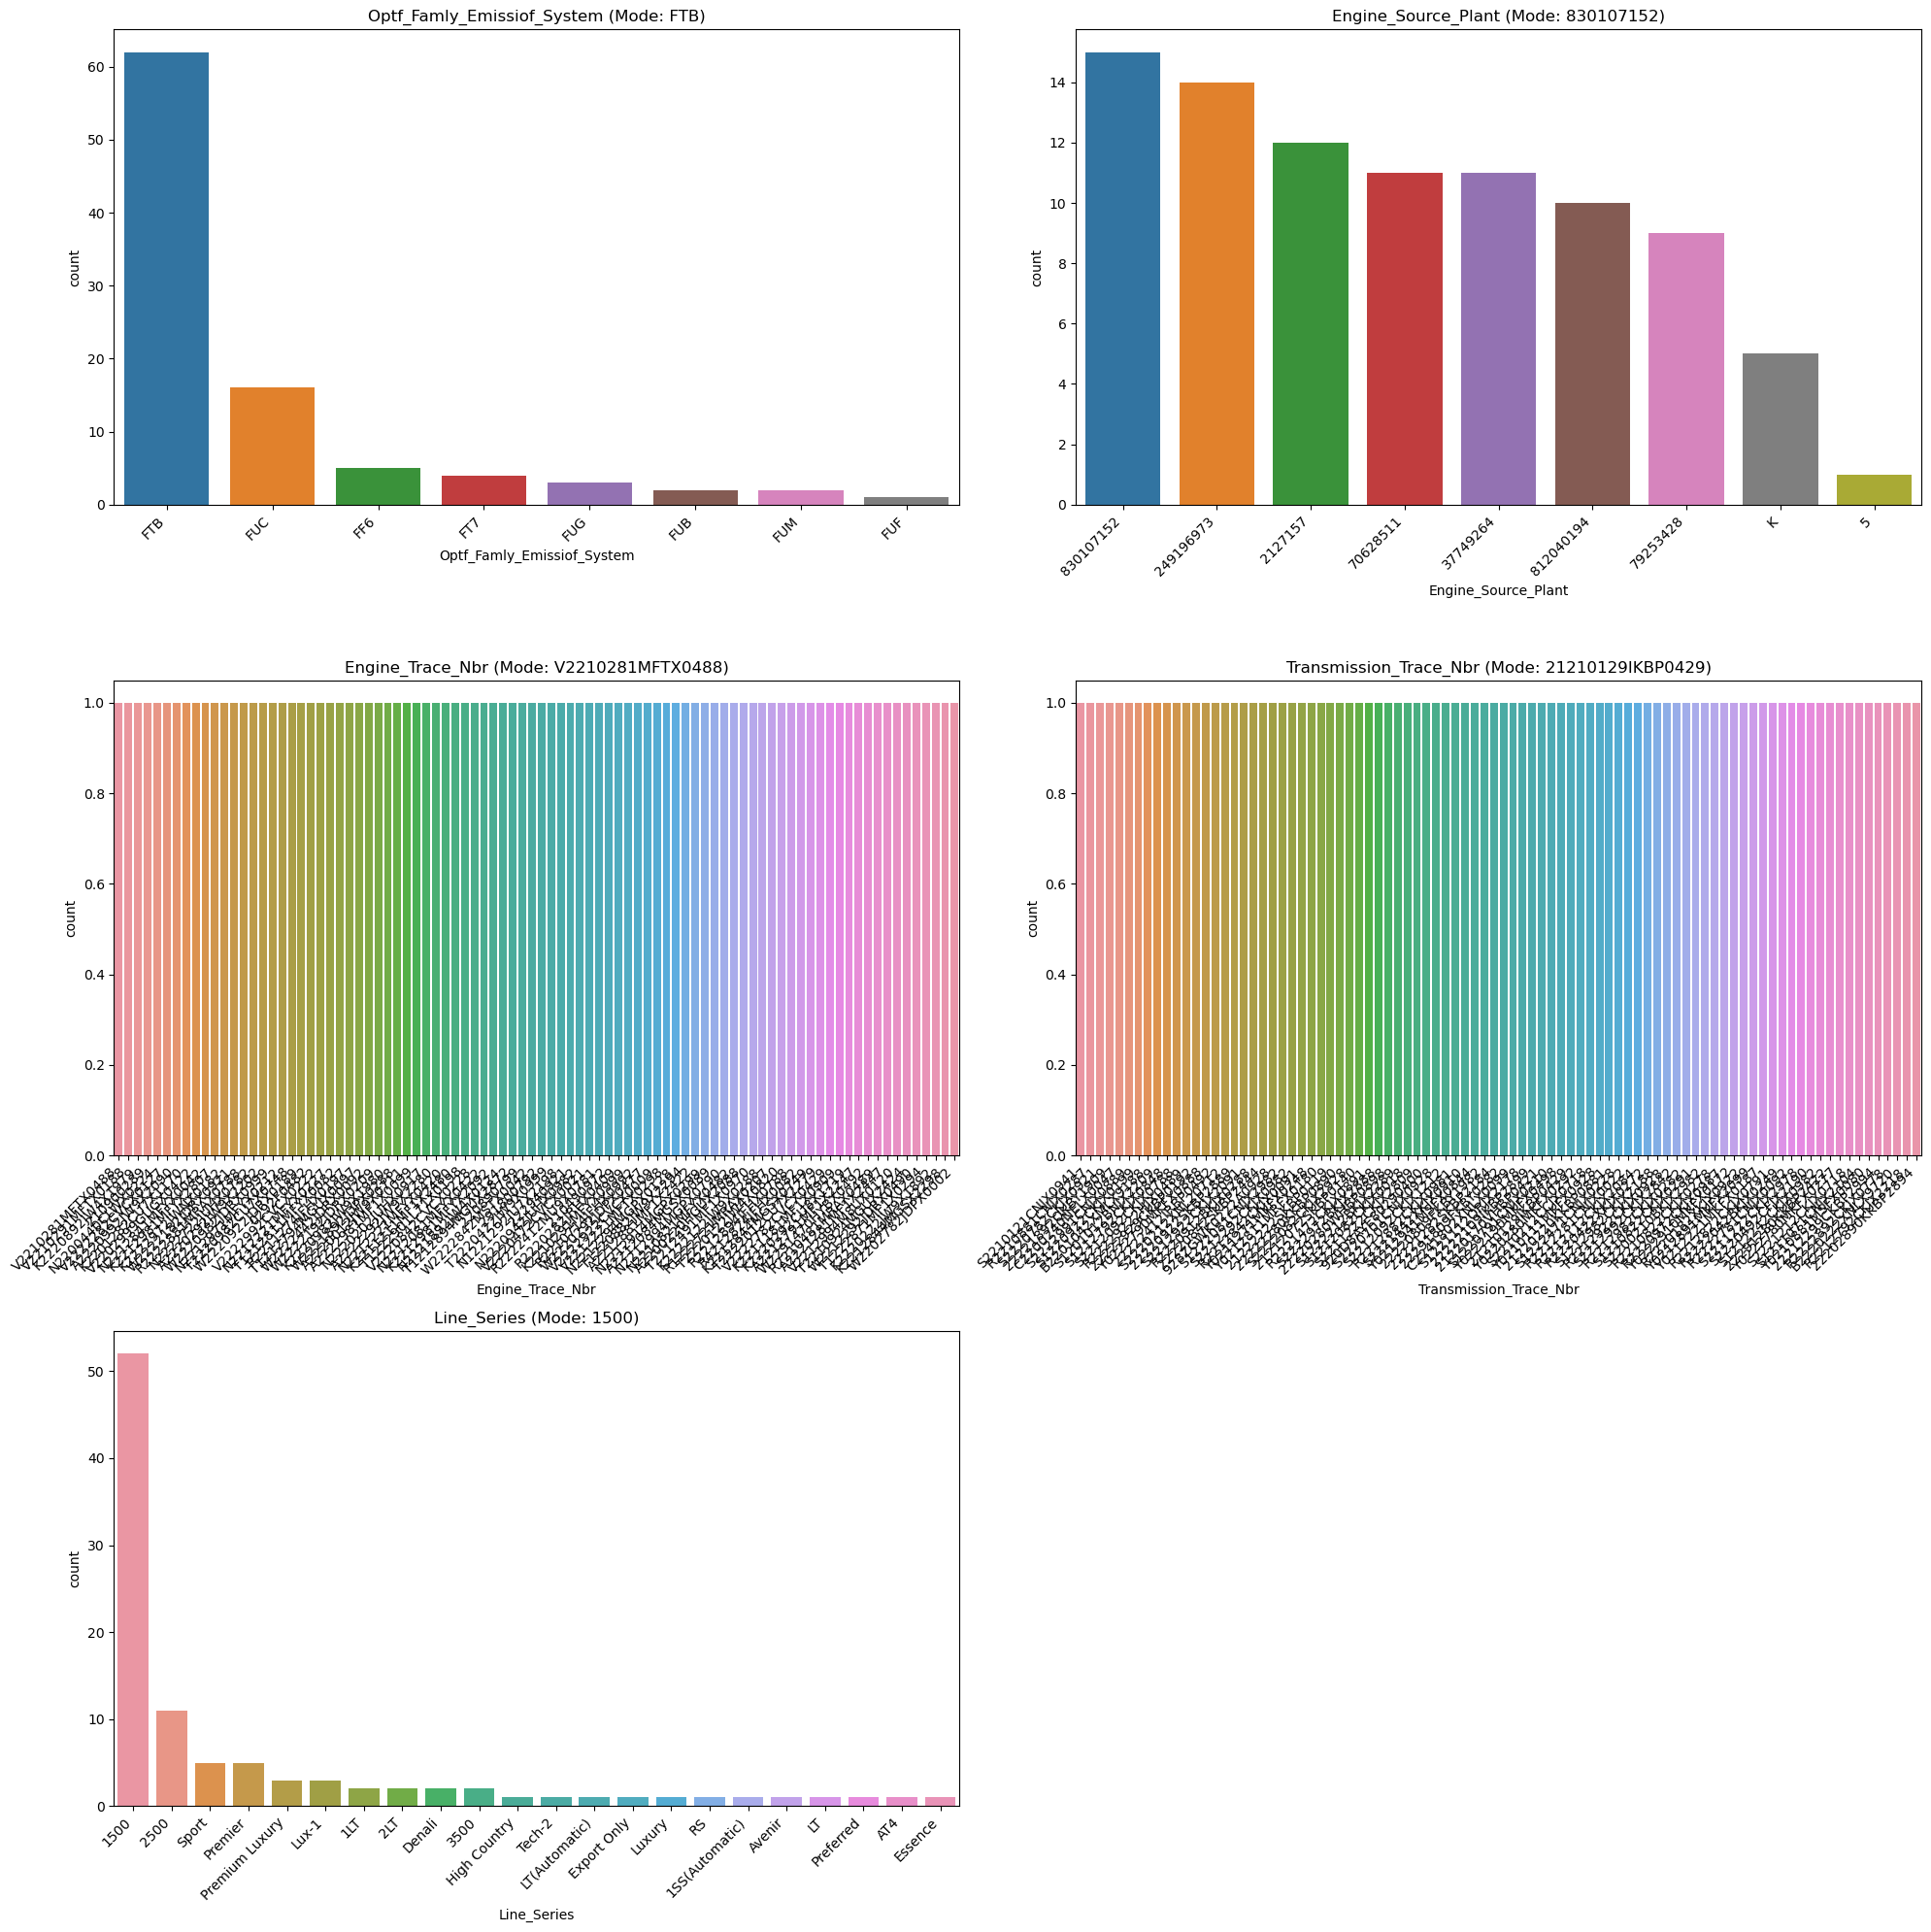

In [39]:
# Plot in chunks of 6 per figure
for start in range(0, len(missing_cols), 6):
    end = start + 6
    subset = missing_cols[start:end]

    plt.figure(figsize=(20, 20), dpi=100)
    
    for i, col in enumerate(subset):
        mode_val = df_cat[col].mode(dropna=True)[0]  # Calculate mode
        plt.subplot(3, 2, i + 1)
        sns.countplot(data=df_cat, x=col, order=df_cat[col].value_counts().index)
        plt.title(f'{col} (Mode: {mode_val})')
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

<h1>Inference:</h1>
    
Here we tried to see which unique values in the categorical columns are having maximum frequency (mode) visually, so that we can replace the missing values with the mode value of the column.

<h1>Modal values for the missing categorical columns</h1>

In [40]:
# Get modal values for each column
modes = {col: df_cat[col].mode(dropna=True)[0] for col in missing_cols}

# Convert to DataFrame for better readability
mode_df = pd.DataFrame(list(modes.items()), columns=['Column', 'Mode_Value'])
mode_df

,Column,Mode_Value
0,Causal_Part_Nm,WHEEL ASM-STRG *JET BLACK
1,Plant,SIL
2,State,CA
3,Repair_Dlr_Postal_Cd,907551909
4,Veh_Test_Grp,T05.3386
5,Optn_Famly_Certification,FE9
6,Optf_Famly_Emissiof_System,FTB
7,Engine_Source_Plant,830107152
8,Engine_Trace_Nbr,V2210281MFTX0488
9,Transmission_Trace_Nbr,21210129IKBP0429


<H1>Imputation using modal value</H1>

In [41]:
# Replace missing values with mode
for col in missing_cols:
    mode_val = df[col].mode(dropna=True)[0]
    df[col].fillna(mode_val, inplace=True)

In [42]:
df.isnull().sum()

Vin                                0
Transaction_Id                     0
Correction_Verbatim                0
Customer_Verbatim                  0
Repair_Date                        0
Causal_Part_Nm                     0
Global_Labor_Code_Description      0
Platform                           0
Body_Style                         0
Vppc                               0
Plant                              0
Build_Country                      0
Last_Known_Dlr_Name                0
Last_Known_Dlr_City                0
Repairing_Dealer_Code              0
Dealer_Name                        0
Repair_Dlr_City                    0
State                              0
Dealer_Region                      0
Repair_Dlr_Postal_Cd               0
Repair_Age                         0
Km                                 0
Complaint_Cd_Csi                   0
Complaint_Cd                       0
Veh_Test_Grp                       0
Country_Sale_Iso                   0
Ord_Selling_Src_Cd                 0
O

<h1>Inference:</h1>
    
We can see that the missing values from the categorical columns has been replaced by the modal value and there are no missing values present in our dataset now.

<h1>Let's see the mising values in Numerical columns</h1>

In [43]:
missing_num_cols = df_num.columns[df_num.isnull().any()]

In [44]:
missing_num_cols

Index(['Campaign_Nbr', 'Totalcost', 'Transmission_Source_Plant',
       'Last_Known_Delvry_Type_Cd'],
      dtype='object')

<h1>Inference</h1>

These are the columns which are having the missing values in the numerical column.

In [45]:
df[missing_num_cols].nunique()

Campaign_Nbr                  0
Totalcost                    94
Transmission_Source_Plant     6
Last_Known_Delvry_Type_Cd    11
dtype: int64

In [46]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Campaign_Nbr', 'Reporting_Cost', 'Totalcost',
       'Lbrcost', 'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_D

<h1>Checking for data for the missing value columns</h1>

In [47]:
df[missing_num_cols].head()

,Campaign_Nbr,Totalcost,Transmission_Source_Plant,Last_Known_Delvry_Type_Cd
0,NaN,370.03,287827.0,21.0
1,NaN,307.32,17749294.0,10.0
2,NaN,3205.45,NaN,10.0
3,NaN,445.28,287827.0,10.0
4,NaN,1439.65,17749294.0,10.0


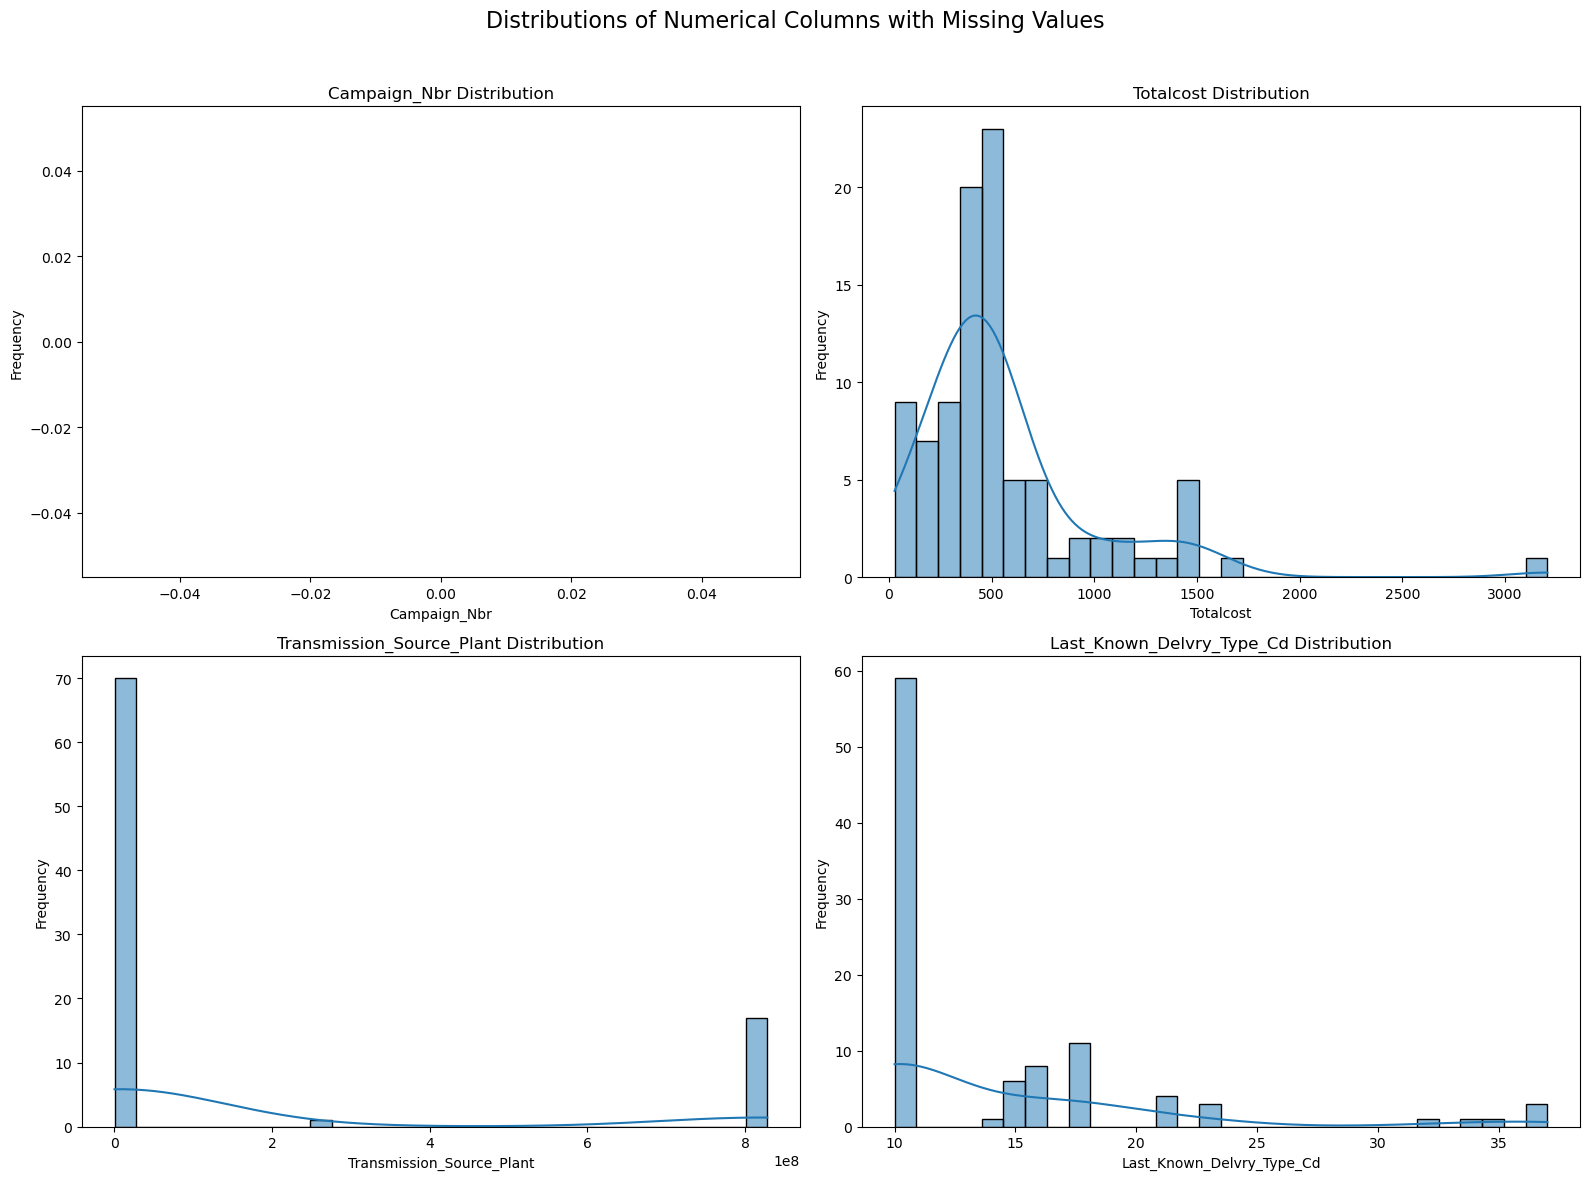

In [48]:
# Set plot size and style
plt.figure(figsize=(16, 12))
plt.suptitle("Distributions of Numerical Columns with Missing Values", fontsize=16)

# Loop through columns and plot
for i, col in enumerate(missing_num_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()

In [49]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Campaign_Nbr', 'Reporting_Cost', 'Totalcost',
       'Lbrcost', 'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_D

<h1>Inference:</h1>

1. Campaign_NBR is not having any values so we can remove this column.
2. TotalCost is rightly skewed distribution of data, we can replace the missing values with the median of the distribution.
3. For Transmission_Source_Plant & Last_Known_Delivry_Type_Cd the unique values are 6 and 11, so we can treat this as we treated categorical columns and impute the missing values via the mode of the distribution.

<h1>Applying the appropriate replacing technique for each of these missing numerical columns</h1>

In [50]:
# Drop column
df.drop(columns=['Campaign_Nbr'], inplace=True)

# Define imputations
impute_map = {
    'Totalcost': df['Totalcost'].median(),
    'Transmission_Source_Plant': df['Transmission_Source_Plant'].mode()[0],
    'Last_Known_Delvry_Type_Cd': df['Last_Known_Delvry_Type_Cd'].mode()[0],
}

# Apply imputations
df.fillna(value=impute_map, inplace=True)

In [51]:
df.isnull().sum()

Vin                              0
Transaction_Id                   0
Correction_Verbatim              0
Customer_Verbatim                0
Repair_Date                      0
Causal_Part_Nm                   0
Global_Labor_Code_Description    0
Platform                         0
Body_Style                       0
Vppc                             0
Plant                            0
Build_Country                    0
Last_Known_Dlr_Name              0
Last_Known_Dlr_City              0
Repairing_Dealer_Code            0
Dealer_Name                      0
Repair_Dlr_City                  0
State                            0
Dealer_Region                    0
Repair_Dlr_Postal_Cd             0
Repair_Age                       0
Km                               0
Complaint_Cd_Csi                 0
Complaint_Cd                     0
Veh_Test_Grp                     0
Country_Sale_Iso                 0
Ord_Selling_Src_Cd               0
Optn_Famly_Certification         0
Optf_Famly_Emissiof_

<h1>Inference:</h1>

We have removed all the missing values from the dataset and now the dataset is free from missing values now.

<H1>Top 5 Critical Columns From Stakeholder's Perspective</H1>

1. VIN - Vechicle Identification Number


I think it is one of the among most important columns of the dataset,because everything traces back to the VIN. It’s like the primary key for each vehicle. Stakeholders (especially QA, legal, service teams) need vehicle-level traceability. Recalls, warranty issues, or defect trends must be tied to specific units. It allows combining data from multiple systems (manufacturing, service, sales).

2. Customer Verbatim - Customer's Complaint Text

I think it is important because it is voice of customer - unfiltered and raw. Stakeholders in customer experience, product design, and quality want to understand perceived problems, not just technical ones. Customers may describe issues not yet categorized, revealing emerging trends. This column prioritize fixes for what actually frustrates customers, not just what the system flags.

3. Causal Part NM - Part That Caused the problem

This column is important because it tells which part was actually failed and makes us tackle the issue. This column is Vital for root cause analysis and product improvement. Without this, we can’t target problems — only react to symptoms, which might create an issue.

4. Repair Age - Vechile Age at the time of Repair

This colum is important because it tells when the failure happened in the vehicle's lifecycle.
This column tells us if early failures often point to manufacturing or design defects and late failures may be expected wear and tear. This helps stakeholders assess whether issues are within warranty coverage or part of long term durability planning.

5. KM - Kilometers Driven

This column is important because it represents how much the vehicle has been used, which strongly affects failure risk. This helps stakeholders can see if parts are failing too early for their usage. It is critical for predictive maintenance, service schedules.

<h1>Data Visualization for these critical columns</h1>

<H2>For Repair Age Column</H2>

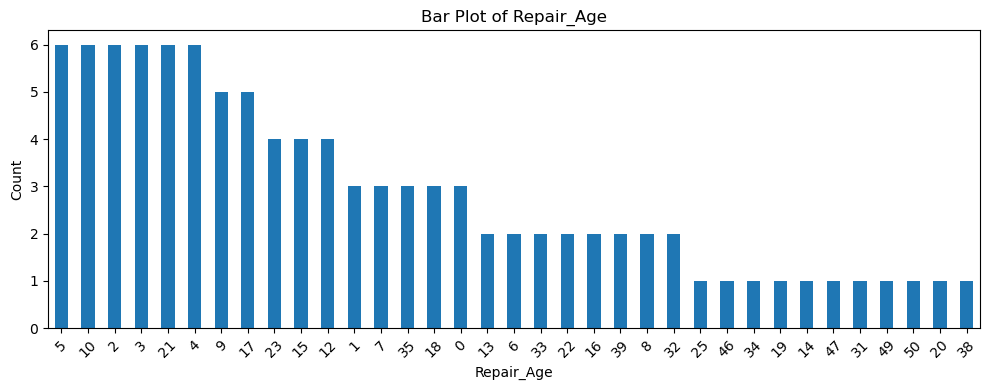

In [52]:
col = 'Repair_Age'

plt.figure(figsize=(10, 4))
df[col].value_counts().plot(kind='bar')
plt.title(f'Bar Plot of {col}')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<H1>Inference:</H1>
    
    
We can see from the graph that the repair age of the items with 5, 10, 2,3,21,4 are high in number and repair age for 25,46, 20, 38 etc are low in numbers.

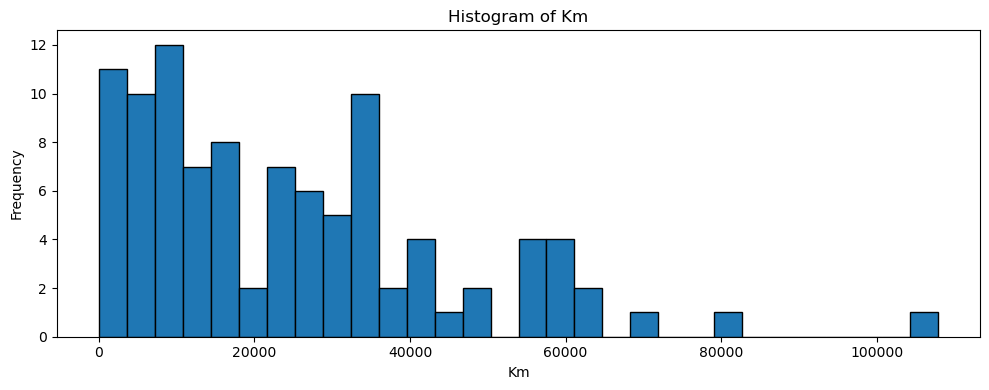

In [53]:
plt.figure(figsize=(10, 4))
df['Km'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Histogram of Km')
plt.xlabel('Km')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<H1>Inference:</H1>
    
    
We can see from the graph that the kilomters used of the items follow a little bit of right skewed data distribution.

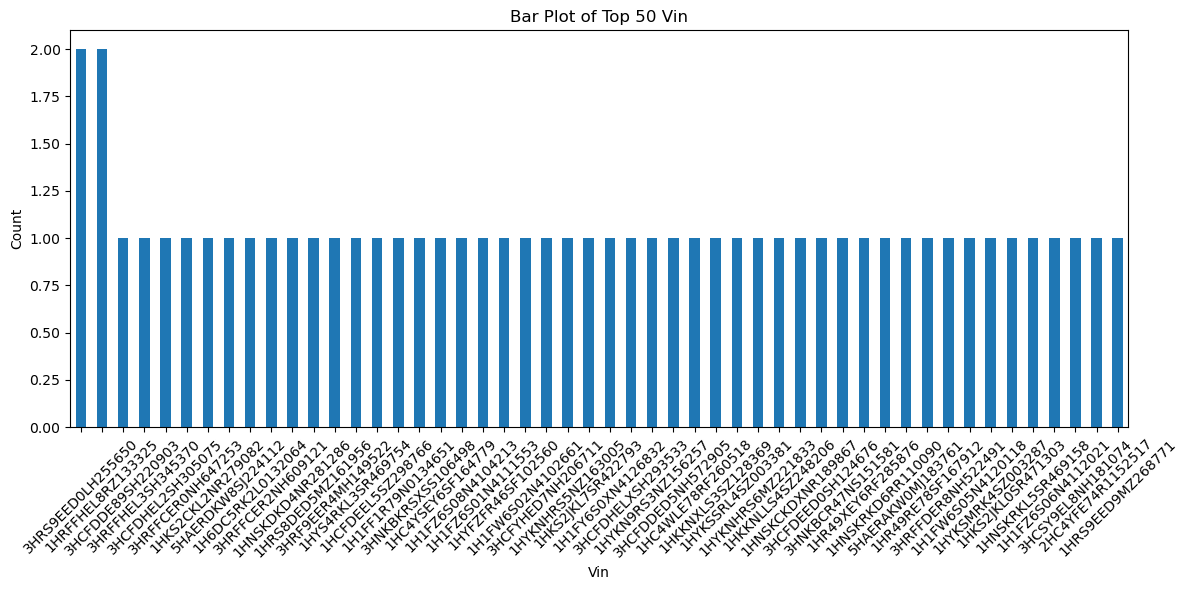

In [54]:
col = 'Vin'  # Correct column name

plt.figure(figsize=(12, 6))
df[col].value_counts().head(50).plot(kind='bar')
plt.title(f'Bar Plot of Top 50 {col}')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

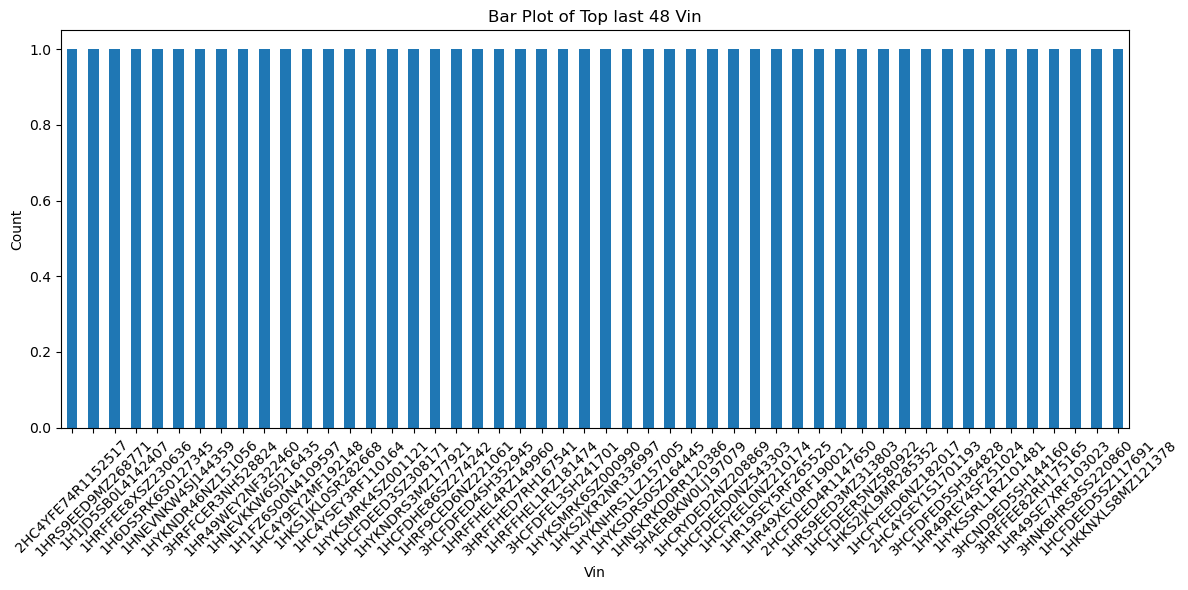

In [55]:
plt.figure(figsize=(12, 6))
df['Vin'].value_counts().tail(50).plot(kind='bar')
plt.title(f'Bar Plot of Top last 48 {col}')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Inference:</h1>
    
From both the graphs we can see that most of the VIN have showed issue only once. Among them only 2 of the starting VIN showed issued twice.

<h1>Outliers in my dataset: Boxplot</h1>

We will check for outliers in my dataset using box plot method in the numerical columns and apply appropriate method to deal with them.

In [56]:
cols_part = df_num.columns

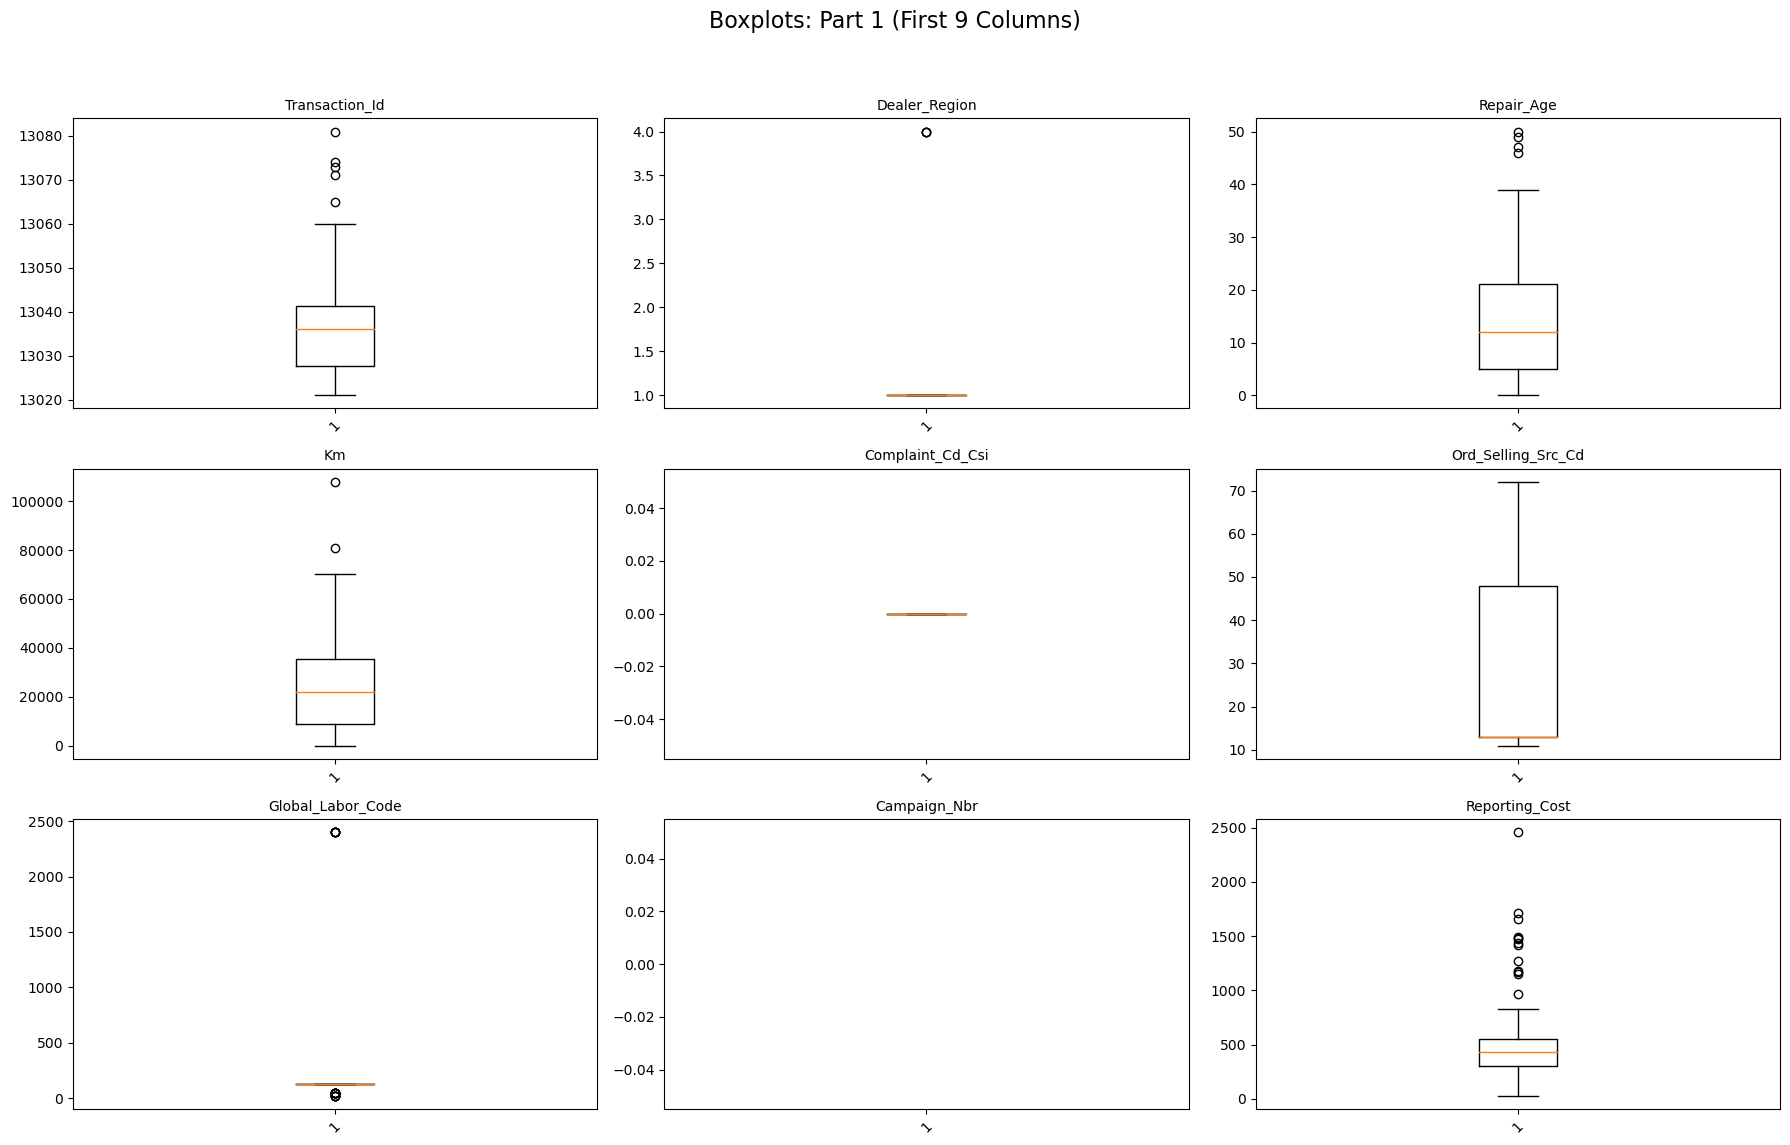

In [57]:
# First 9 columns
cols_part1 = df_num.columns[:9]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Boxplots: Part 1 (First 9 Columns)', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(cols_part1):
    axes[i].boxplot(df_num[col].dropna())
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<h1>Inference</h1>

We can see from the above box plot charts that these columns are having outliers in their data: Transaction_id, dealer_region, repair_age, km, global_labor_code, reporting_cost. For now since transcation_id is showing outliers which might not be the case, but here we will assume that it might be some input issue and we will apply appropriate method to replace these outliers in transcation_id.If that is not the case then, these are not the outliers but the values having extreme values and need not to be worked upon but here we will go with the first assumption.

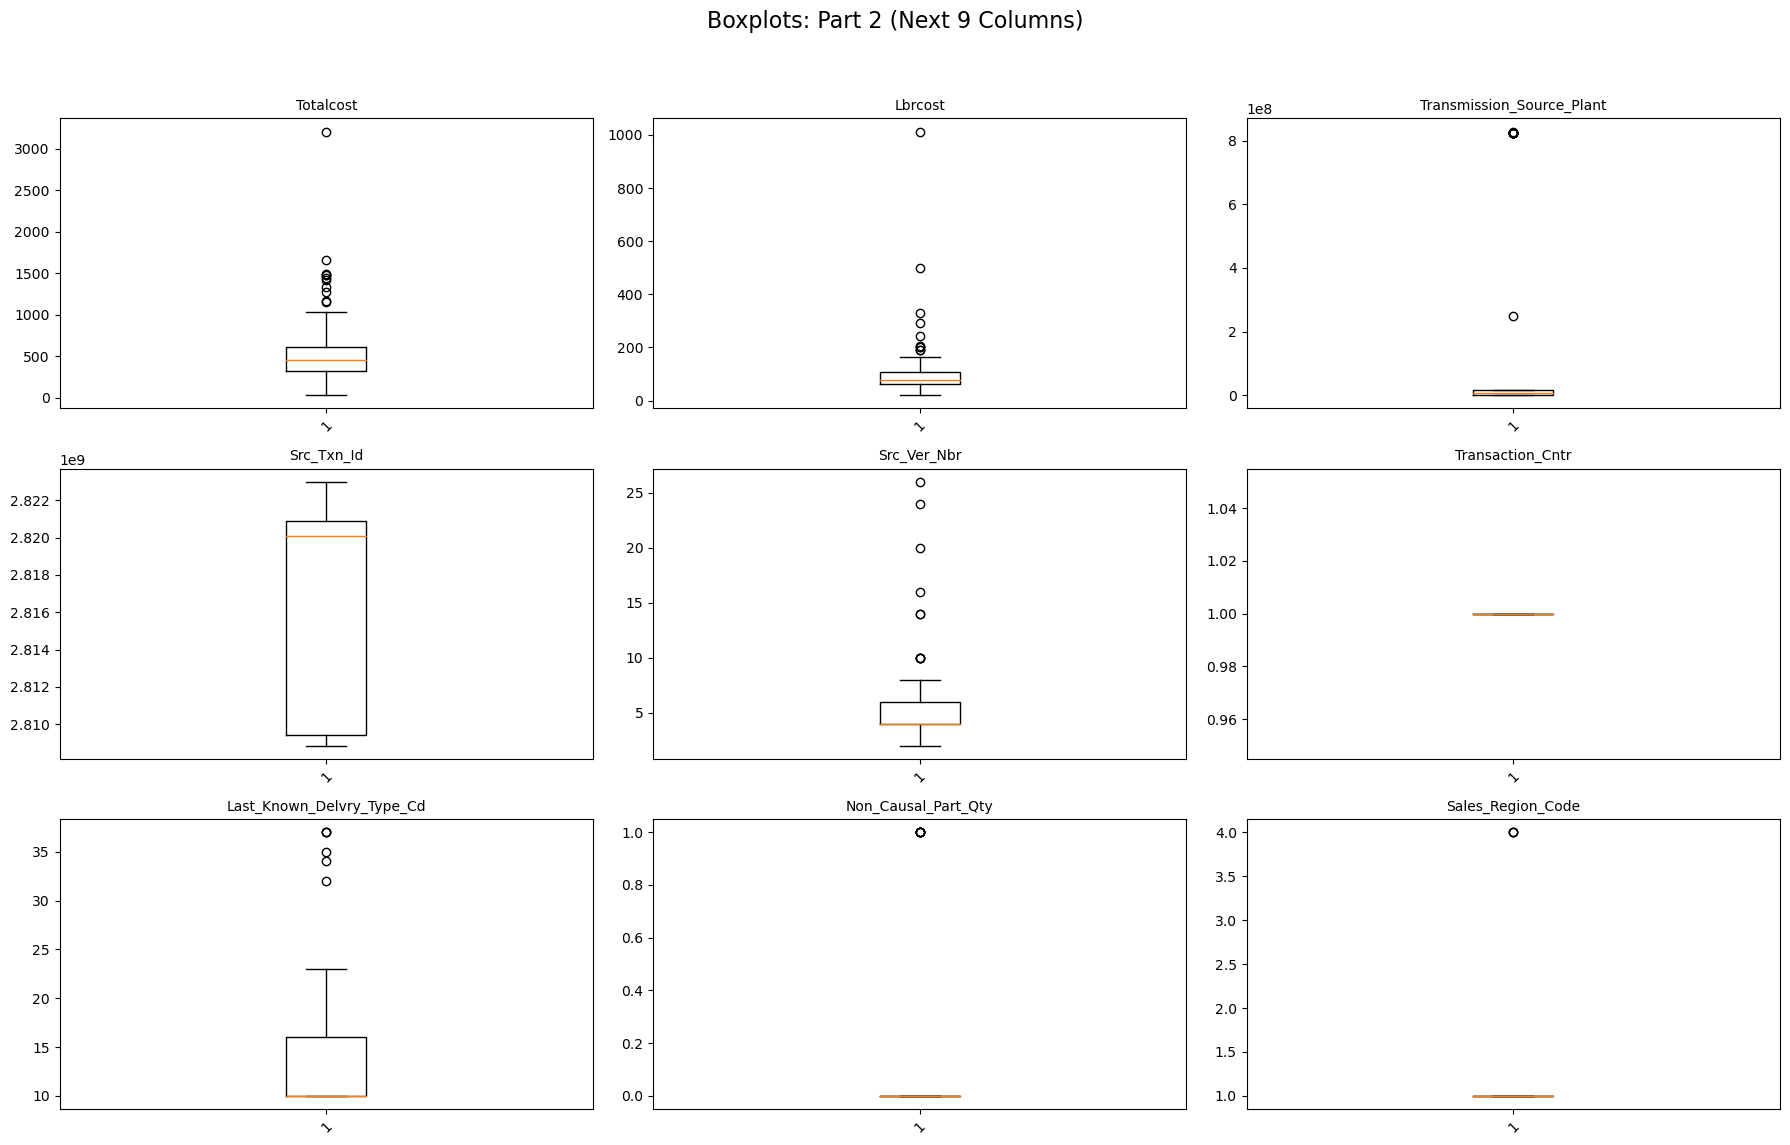

In [58]:
# Next 9 columns
cols_part2 = df_num.columns[9:]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Boxplots: Part 2 (Next 9 Columns)', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(cols_part2):
    axes[i].boxplot(df_num[col].dropna())
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [59]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Reporting_Cost', 'Totalcost', 'Lbrcost',
       'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_Delvry_Type_Cd', 

<h1>Inference</h1>

We can see from the above box plot charts that these more columns are having outliers in their data: totalcost,lbrcost,transmission_source_plant, src_ver_nbr, least_known_delivery_type_cd, non_causal_part_only,and sales_region_code.

<h1>Applying Winsorization method to deal with these outliers</H1>

In [60]:
def cap_outliers_iqr(df):
    df_capped = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df[col] > upper_bound, upper_bound,
                           np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df_capped

In [61]:
outlier_columns = [
    'Transaction_Id',
    'Dealer_Region',
    'Repair_Age',
    'Km',
    'Global_Labor_Code',
    'Reporting_Cost',
    'Totalcost',
    'Lbrcost',
    'Transmission_Source_Plant',
    'Src_Ver_Nbr',
    'Last_Known_Delvry_Type_Cd',
    'Non_Causal_Part_Qty',
    'Sales_Region_Code'
]


In [62]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Reporting_Cost', 'Totalcost', 'Lbrcost',
       'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_Delvry_Type_Cd', 

In [63]:
# Apply Winsorization
df_capped = cap_outliers_iqr(df[outlier_columns])

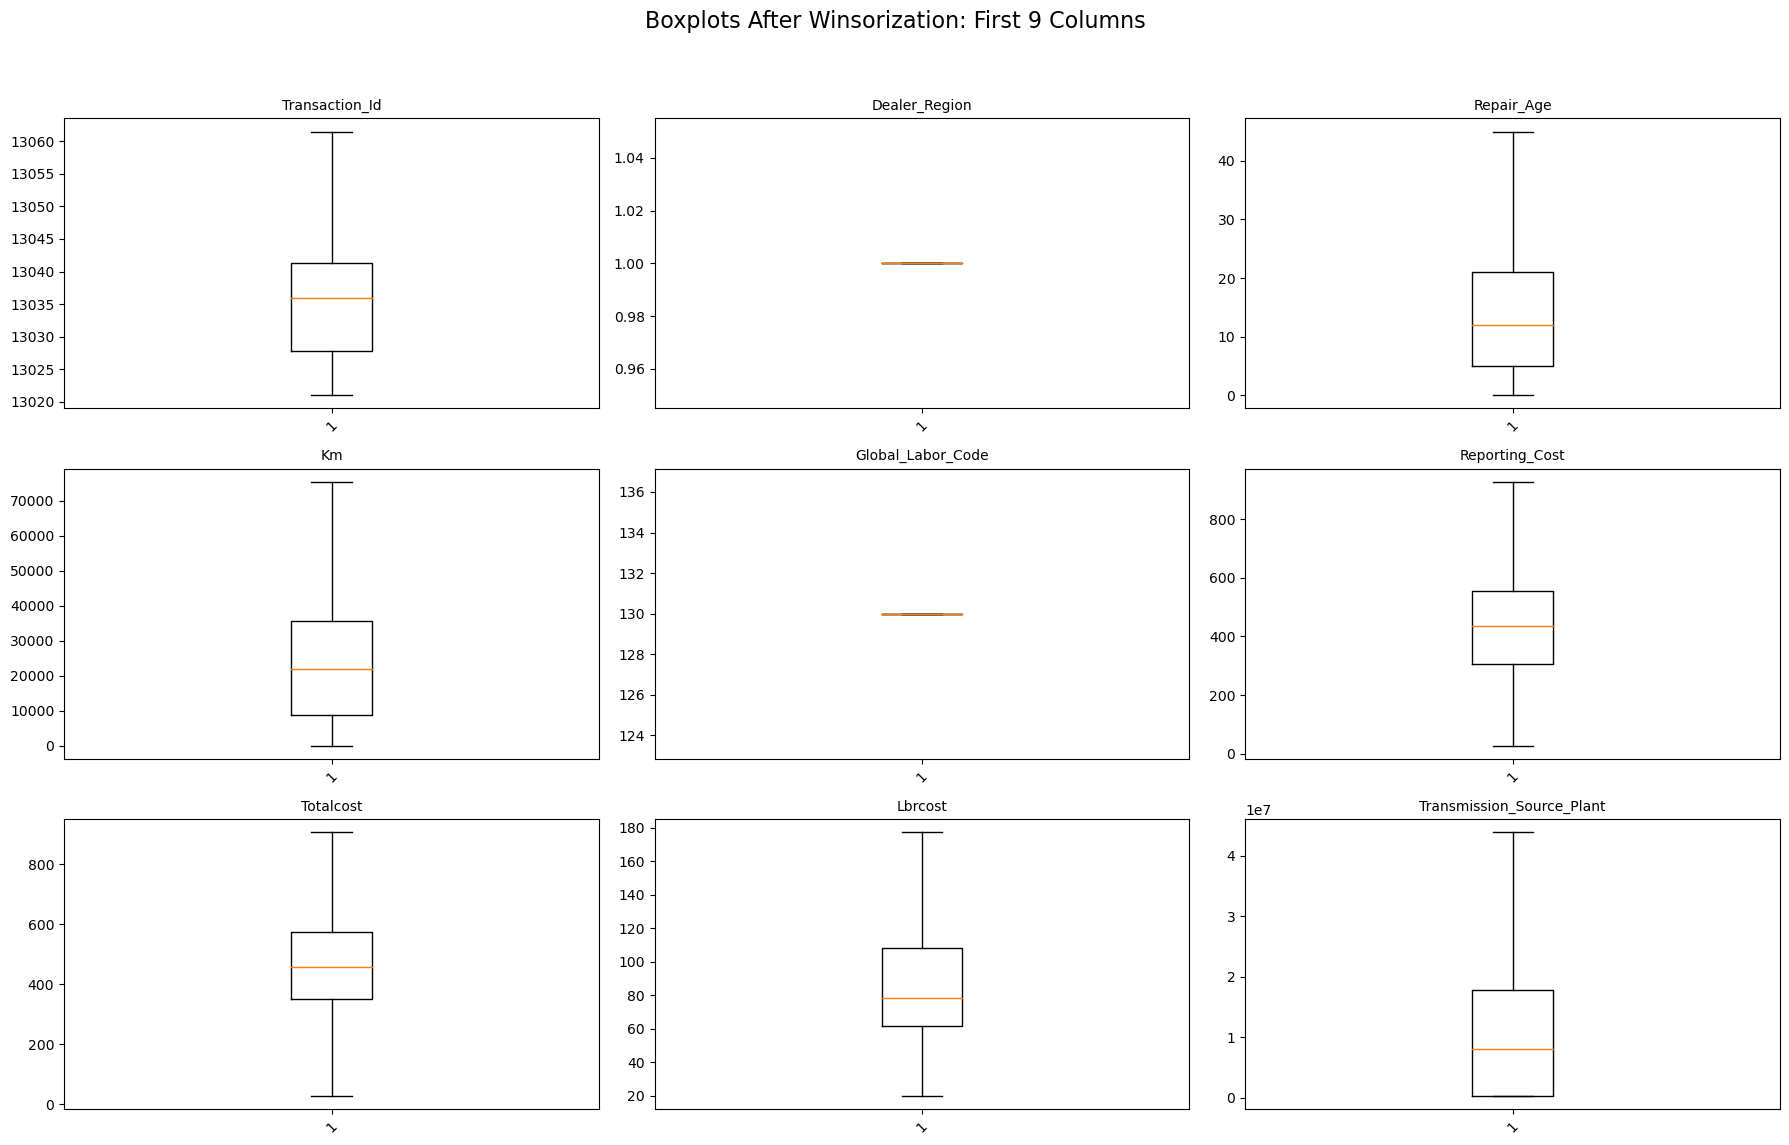

In [64]:
# Plot first 9 columns
cols_part1 = df_capped.columns[:9]

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Boxplots After Winsorization: First 9 Columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(cols_part1):
    axes[i].boxplot(df_capped[col].dropna())
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

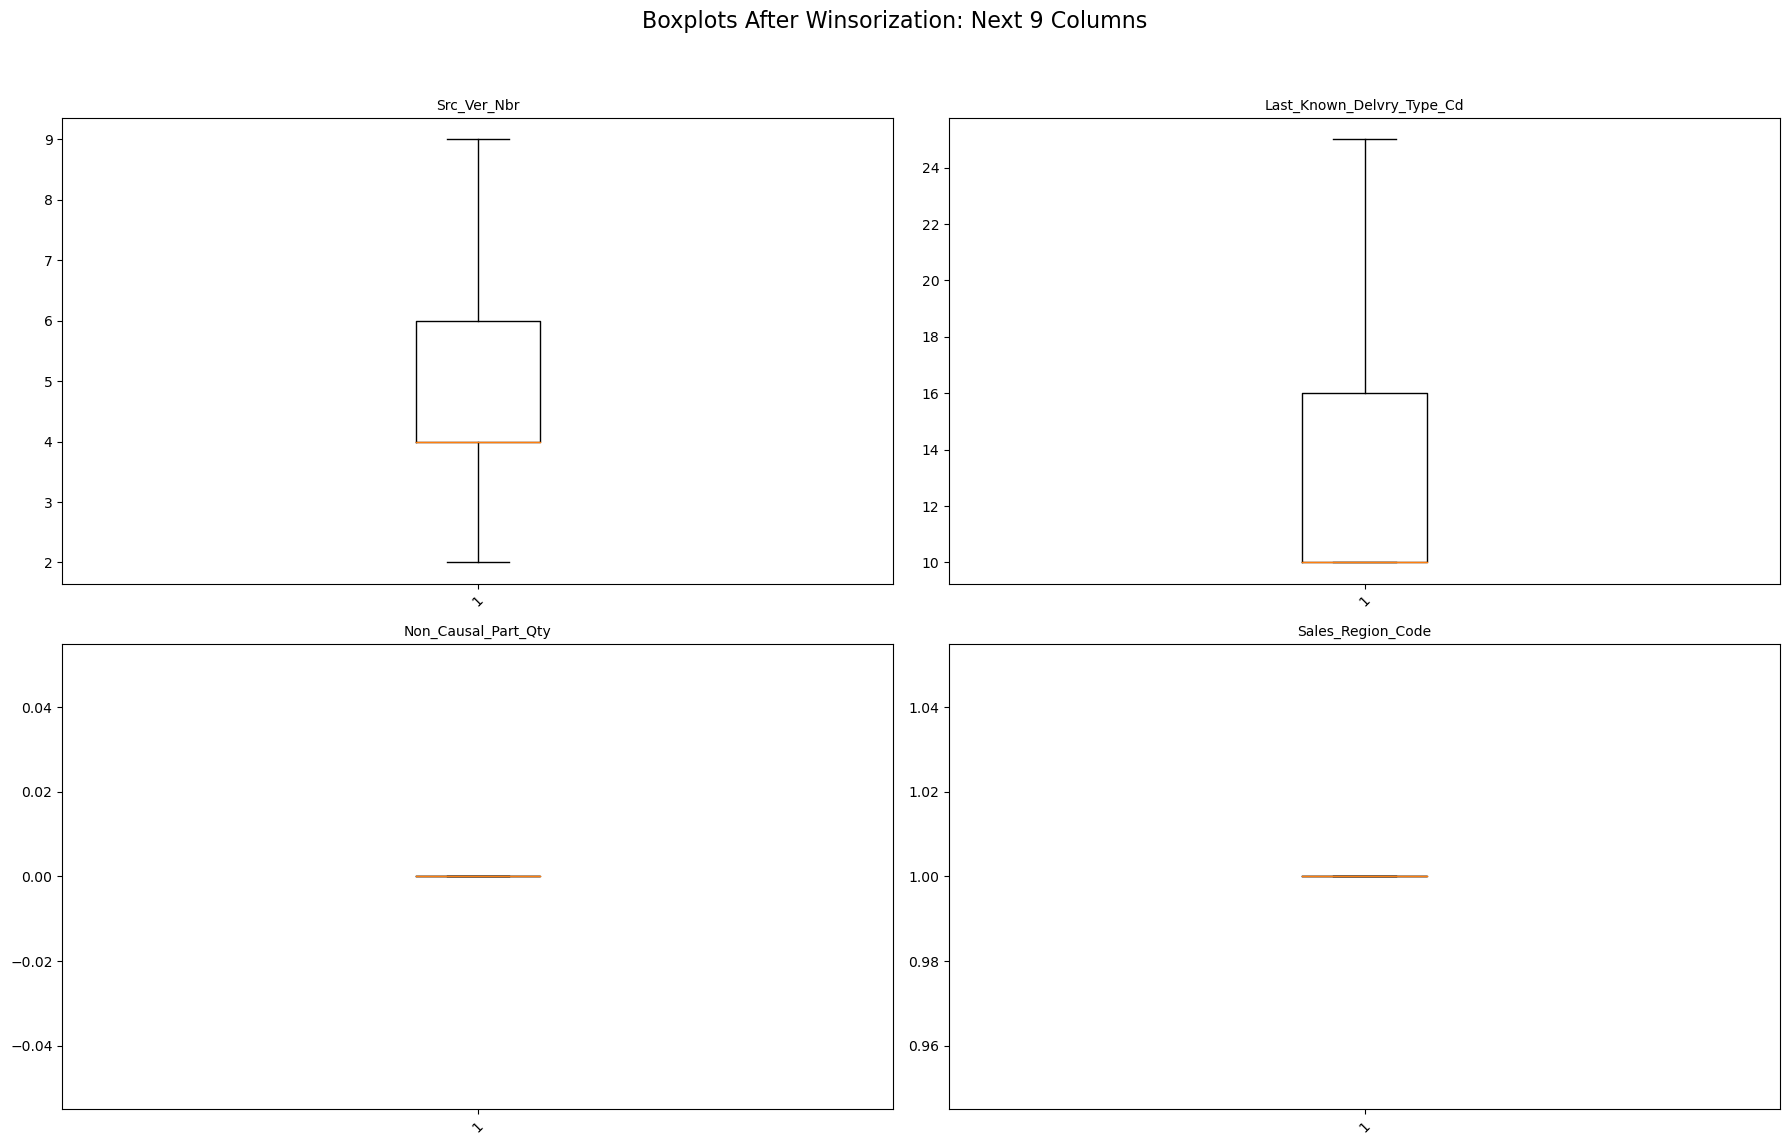

In [65]:
# Plot first 9 columns
cols_part1 = df_capped.columns[9:]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Boxplots After Winsorization: Next 9 Columns', fontsize=16)

axes = axes.flatten()

for i, col in enumerate(cols_part1):
    axes[i].boxplot(df_capped[col].dropna())
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<h1>Inference:</h1>
    
We can see that now our columns are not at all having any outliers in my numerical columns.

<h1>Used the keywords from taxonomy sheet of DA task 1 excel file</h1>

In [66]:
failure_conditions = ['overheating', 'leak', 'noise', 'vibration', 'won\'t start', 'not working', 'inoperative', 'no power', 'warning light']
components = ['steering wheel', 'brake', 'engine', 'transmission', 'battery', 'sensor', 'seat', 'display', 'camera']
actions = ['replaced', 'adjusted', 'cleaned', 'tightened', 'updated', 'flushed', 'reprogrammed', 'diagnosed', 'checked']

# Tag generator
def generate_tags(text, keywords):
    if pd.isna(text):
        return ''
    text_lower = text.lower()
    return ', '.join(sorted(set(kw for kw in keywords if kw in text_lower)))

# Apply to your DataFrame
df['Tag_Condition'] = df['Customer_Verbatim'].apply(lambda x: generate_tags(x, failure_conditions))
df['Tag_Component'] = df['Customer_Verbatim'].apply(lambda x: generate_tags(x, components))
df['Tag_Action'] = df['Correction_Verbatim'].apply(lambda x: generate_tags(x, actions))

In [67]:
df.columns

Index(['Vin', 'Transaction_Id', 'Correction_Verbatim', 'Customer_Verbatim',
       'Repair_Date', 'Causal_Part_Nm', 'Global_Labor_Code_Description',
       'Platform', 'Body_Style', 'Vppc', 'Plant', 'Build_Country',
       'Last_Known_Dlr_Name', 'Last_Known_Dlr_City', 'Repairing_Dealer_Code',
       'Dealer_Name', 'Repair_Dlr_City', 'State', 'Dealer_Region',
       'Repair_Dlr_Postal_Cd', 'Repair_Age', 'Km', 'Complaint_Cd_Csi',
       'Complaint_Cd', 'Veh_Test_Grp', 'Country_Sale_Iso',
       'Ord_Selling_Src_Cd', 'Optn_Famly_Certification',
       'Optf_Famly_Emissiof_System', 'Global_Labor_Code',
       'Transaction_Category', 'Reporting_Cost', 'Totalcost', 'Lbrcost',
       'Engine', 'Engine_Desc', 'Transmission', 'Transmission_Desc',
       'Engine_Source_Plant', 'Engine_Trace_Nbr', 'Transmission_Source_Plant',
       'Transmission_Trace_Nbr', 'Src_Txn_Id', 'Src_Ver_Nbr',
       'Transaction_Cntr', 'Media_Flag', 'Vin_Modl_Desgtr', 'Line_Series',
       'Last_Known_Delvry_Type_Cd', 

In [68]:
df[['Correction_Verbatim','Tag_Condition', 'Tag_Component', 'Tag_Action']].head(10)

,Correction_Verbatim,Tag_Condition,Tag_Component,Tag_Action
0,REPLACED STEERING WHEEL NOW OKAY,,steering wheel,replaced
1,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",,steering wheel,"checked, replaced"
2,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",,steering wheel,replaced
3,STEERING WHEEL REPLACEMENT,,steering wheel,
4,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,,,replaced
5,Remove and replace steering wheel wire harness,,steering wheel,
6,"ACCESSED, REMOVED AND REPLACED THE DRIVERS ASSISTANCE SYSTEMS MODULE. ACCESSED THE DIAGNOSTICPORTANDREPROGRAMMEDTHESYSTEMCALIBRATION USING THE MDI-2 WITH A WARRANTY CLAIM PROGRAMMING CODE OF FDYZ197418154. ROAD TESTEDTHEVEHICLETOVERIFYREPAIRS. THESYSTEM IS NOW OPERATING AS DESIGNED.",,,"replaced, reprogrammed"
7,REPLACED STEERING WHEEL,not working,steering wheel,replaced
8,TECHNICIAN FOUND THE STEERING COLUMN PLASTIC TRIM WAS NOT ALIGNED PROPERLY ADJUSTED TRIM AND FOUND THE CUSTOMER CONCERN IS NOLONGER PRESENT,noise,steering wheel,adjusted
9,Steering Wheel Replacement,,,


In [69]:
df['Tag_Component'].value_counts()

Tag_Component
steering wheel    83
                  16
seat               1
Name: count, dtype: int64

In [70]:
df['Tag_Condition'].value_counts()

Tag_Condition
                 90
not working       5
noise             3
inoperative       1
warning light     1
Name: count, dtype: int64

In [71]:
df['Tag_Action'].value_counts()

Tag_Action
replaced                  48
                          42
checked, replaced          5
checked                    3
replaced, reprogrammed     1
adjusted                   1
Name: count, dtype: int64

In [72]:
df[['Dealer_Name','Reporting_Cost','Totalcost']]

,Dealer_Name,Reporting_Cost,Totalcost
0,Apex Auto Sales,370.03,370.03
1,SilverPeak Motors,307.32,307.32
2,Quantum Car Traders,2457.45,3205.45
3,Summit Drive Auto,445.28,445.28
4,Horizon Motors,1439.65,1439.65
...,...,...,...
95,PrimeWheel Auto,718.53,1026.53
96,BlueStream Car Traders,1474.06,1474.06
97,Crestline Drive Auto,481.95,481.95
98,WestPoint Motors,101.85,101.85


<H1>Saving the cleaned dataset</H1>

In [73]:
df.to_excel('Task_2_Cleaned_Data.xlsx', index = False)

<h1>Results:</h1>
So we have cleaned our dataset and also got meaningful insights from it.